In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt


def file_to_json(filename):
  with open(filename) as json_file: 
      data = json.load(json_file) 
  return data

In [ ]:
dlib_annotated = file_to_json('/content/dlib_annotation_resized.json')
faces_annotated = file_to_json('/content/faces_annotated.json')
mtcnn_annotated = file_to_json('/content/mtcnn_annotated_resized.json')
retinanet_annotated = file_to_json('/content/retinanet_annotated_resized.json')
violajones_annotated = file_to_json('/content/violajones_annotations_resized.json')


In [ ]:
import os
from PIL import Image 
faces_annotated_resize = faces_annotated

directory = r'/content/width'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        filepath =(os.path.join(directory, filename))
        img = Image.open(filepath)
        scale_factor = 300/img.width
        id = (str(int(filename.split("_")[0])))

        faces_annotated_resize[id]["bounding_box"]["x"] = faces_annotated_resize[id]["bounding_box"]["x"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["y"] = faces_annotated_resize[id]["bounding_box"]["y"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["w"] = faces_annotated_resize[id]["bounding_box"]["w"] * scale_factor
        faces_annotated_resize[id]["bounding_box"]["h"] = faces_annotated_resize[id]["bounding_box"]["h"] * scale_factor

        left_eye = faces_annotated_resize[id]["landmarks"]["left_eye"]
        right_eye = faces_annotated_resize[id]["landmarks"]["right_eye"]
        nose = faces_annotated_resize[id]["landmarks"]["nose"]
        left_mouth = faces_annotated_resize[id]["landmarks"]["left_mouth"]
        right_mouth = faces_annotated_resize[id]["landmarks"]["right_mouth"]


        faces_annotated_resize[id]["landmarks"]["left_eye"] = [left_eye[0]*scale_factor,left_eye[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["right_eye"] = [right_eye[0]*scale_factor,right_eye[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["nose"] = [nose[0]*scale_factor,nose[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["left_mouth"] = [left_mouth[0]*scale_factor,left_mouth[1]*scale_factor]
        faces_annotated_resize[id]["landmarks"]["right_mouth"] = [right_mouth[0]*scale_factor,right_mouth[1]*scale_factor]


    else:
        continue
faces_annotated = faces_annotated_resize

In [ ]:
def compare(groundtruth,algorithm):
  difference = {}
  for id in range(48):
    id=str(id)
    alg = (algorithm[id]["landmarks"])
    ground = (groundtruth[id]["landmarks"])
    norm_factor =(np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["left_eye"])))

    dist_left_eye = (np.linalg.norm(np.array(alg["left_eye"])-np.array(ground["left_eye"])))/ norm_factor
    dist_right_eye = (np.linalg.norm(np.array(alg["right_eye"])-np.array(ground["right_eye"])))/ norm_factor
    dist_nose = (np.linalg.norm(np.array(alg["nose"])-np.array(ground["nose"])))/ norm_factor
    dist_left_mouth = (np.linalg.norm(np.array(alg["left_mouth"])-np.array(ground["left_mouth"])))/ norm_factor
    dist_right_mouth = (np.linalg.norm(np.array(alg["right_mouth"])-np.array(ground["right_mouth"])))/ norm_factor

    # print("ID:",id)
    # print("left_eye_distance:",dist_left_eye,"\tright_eye_distance:",dist_right_eye)
    # print("nose_distance:",dist_nose)
    # print("left_mouth_distance:",dist_left_mouth,"\tright_mouth_distance:",dist_right_mouth)
    # print("")
    difference[id] = {"left_eye_distance":dist_left_eye*100, "right_eye_distance":dist_right_eye*100,"nose_distance":dist_nose*100,"left_mouth_distance":dist_left_mouth*100,"right_mouth_distance":dist_right_mouth*100}
  return difference






In [ ]:
dlib_diff = compare(faces_annotated,dlib_annotated)
mtcnn_diff = compare(faces_annotated,mtcnn_annotated)
retinaface_diff = compare(faces_annotated,retinanet_annotated)

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
def show_face_comparison(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")
  
  x = int(faces_annotated_resize[id]["bounding_box"]["x"])
  y = int(faces_annotated_resize[id]["bounding_box"]["y"])
  w = int(faces_annotated_resize[id]["bounding_box"]["w"])
  h = int(faces_annotated_resize[id]["bounding_box"]["h"])

  print(x,y,w,h)

  landmarks = faces_annotated_resize[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(dlib_annotated[id]["bounding_box"]["x"])
  y = int(dlib_annotated[id]["bounding_box"]["y"])
  w = int(dlib_annotated[id]["bounding_box"]["w"])
  h = int(dlib_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = dlib_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
    
  #-------------------------------------------------------------------------------

  x = int(retinanet_annotated[id]["bounding_box"]["x"])
  y = int(retinanet_annotated[id]["bounding_box"]["y"])
  w = int(retinanet_annotated[id]["bounding_box"]["w"])
  h = int(retinanet_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = retinanet_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 0, 0), -1)

  #-------------------------------------------------------------------------------

  x = int(mtcnn_annotated[id]["bounding_box"]["x"])
  y = int(mtcnn_annotated[id]["bounding_box"]["y"])
  w = int(mtcnn_annotated[id]["bounding_box"]["w"])
  h = int(mtcnn_annotated[id]["bounding_box"]["h"])
  print(x,y,w,h)

  landmarks = mtcnn_annotated[id]["landmarks"]

  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

  for keys in landmarks:
    coord = landmarks[keys]
    x=int(coord[0])
    y=int(coord[1])
    cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

  #-------------------------------------------------------------------------------


  img = np.zeros((64,128,3), np.uint8)


  font                   = cv2.FONT_HERSHEY_SIMPLEX
  bottomLeftCornerOfText = (10,10)
  fontScale              = 0.35
  fontColor              = (255,255,255)
  lineType               = 0

  cv2.putText(img,'GroundTruth:', (10,10), font, fontScale,fontColor,lineType)
  cv2.putText(img,'MTCNN:', (10,25), font, fontScale,fontColor,lineType)
  cv2.putText(img,'DLIB:', (10,40), font, fontScale,fontColor,lineType)
  cv2.putText(img,'RetinaFace:', (10,55), font, fontScale,fontColor,lineType)

  cv2.circle(img, (90, 6), 4, (0, 255, 0), -1)
  cv2.circle(img, (90, 21), 4, (255, 255, 0), -1)
  cv2.circle(img, (90, 36), 4, (0, 0, 255), -1)
  cv2.circle(img, (90, 51), 4, (255, 0, 0), -1)

  # cv2_imshow(img)
  # cv2_imshow(image)
  s_img = img
  l_img = image

  l_img[0:s_img.shape[0], 0:s_img.shape[1]] = s_img
  cv2_imshow(l_img)


In [ ]:
def show_face_comparison_viola(id):
  if (id>=0 and id<24):
    gender = "m"
  else:
    gender="f"
  
  if (id>=0 and id<12 or id>=24 and id<36):
    represented = "m"
  else:
    represented = "r"

  file_id=str(id)
  id = str(id)
  if (len(file_id)<2):
    file_id = "0"+file_id
  
  
  image = cv2.imread("/content/dataset/"+file_id+"_"+gender+"_"+represented+".jpg")

  for face_id in violajones_annotated[id]:
    box = violajones_annotated[id][face_id]
    x = int(box["x"])
    y = int(box["y"])
    w = int(box["w"])
    h = int(box["h"])
    print(x,y,w,h)

    cv2.rectangle(image, (x, y), (x + w, y + h), (100, 255, 255), 2)
  cv2_imshow(image)




In [ ]:
import numpy as np

def count_diff(algorithm,threshold):
  # bucket_left_eye = {}
  # bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100]
  l_m={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  l_r={"left_eye_distance":[],
     "right_eye_distance":[],
     "nose_distance":[],
     "left_mouth_distance":[],
     "right_mouth_distance":[]
     }
  m_count = 0
  r_count = 0
  for id in algorithm:
    face = (algorithm[id])
    for feature in face:
      value = face[feature]
      if value >= threshold:
        l[feature].append(value)
        id = int(id)
        if (id>=0 and id<12 or id>=24 and id<36):
          m_count += 1
          l_m[feature].append(value)
          
        else:
          r_count += 1
          l_r[feature].append(value)
      # else:
      #   continue:
      #    #print(id, value, feature)
          
  return m_count,r_count,l_m,l_r,l

In [ ]:
miniority_count, represented_count,dlib_error_list_m,dlib_error_list_r,dlib_error_list = count_diff(dlib_diff,0)
print("DLIB",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,mtcnn_error_list_m,mtcnn_error_list_r,mtcnn_error_list = count_diff(mtcnn_diff,0)
print("MTCNN",miniority_count, represented_count,miniority_count-represented_count)

miniority_count, represented_count,retinaface_error_list_m,retinaface_error_list_r,retinaface_error_list = count_diff(retinaface_diff,0)
print("RetinaFace",miniority_count, represented_count,miniority_count-represented_count)

DLIB 120 120 0
MTCNN 120 120 0
RetinaFace 120 120 0


In [ ]:
def histogram(listforfeature, nameofhistogram):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  left_eye_distance = (listforfeature["left_eye_distance"])
  right_eye_distance = (listforfeature["right_eye_distance"])
  nose_distance = (listforfeature["nose_distance"])
  left_mouth_distance = (listforfeature["left_mouth_distance"])
  right_mouth_distance = (listforfeature["right_mouth_distance"])

  bins = np.linspace(0, 15, 16)
  #print(bins)

  plt.hist([left_eye_distance,right_eye_distance,nose_distance,left_mouth_distance,right_mouth_distance], bins, label=['left_eye_distance', 'right_eye_distance','nose_distance','left_mouth_distance','right_mouth_distance'])
  plt.xticks(bins)
  plt.yticks(np.linspace(0, 15, 16))
  title = "Histogram of Error difference for " + nameofhistogram
  plt.title(title)
  plt.xlabel('Error Difference %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()

In [ ]:
#plt.plot(min_list, rep_list, 'r')
def __errorThreshold(min_list,rep_list,name):
  plt.figure(figsize=(20,10))
  plt.style.use('fivethirtyeight')
  min_plt, = plt.plot( [0,1,2,3,4,5,6,7,8,9,10], min_list,color='g',marker = '*',label = "minority",linewidth = 2)
  rep_plt, = plt.plot([0,1,2,3,4,5,6,7,8,9,10],rep_list,color = 'r' , marker = '*',label= "represented",linewidth = 2)
  plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
  title = "Frequency of errors at different error thresholds for " + name
  plt.title(title)
  plt.xlabel('Error Thresholds')
  plt.ylabel('Number of errors')
  plt.legend(handles = [min_plt,rep_plt] ,loc='upper right',prop={'size': 10})
  plt.show()

In [ ]:
def errorThreshold(algorithm,nameofalg):
  min_list = []
  rep_list=[]
  for x in range(11):
    #print(x)
    m, r,_,_,_ = count_diff(algorithm,x)
    # print("DLIB",miniority_count, represented_count,miniority_count-represented_count)
    min_list.append(m)
    rep_list.append(r)


  __errorThreshold(min_list,rep_list,nameofalg)

In [ ]:
def max_error(algortihm):
  max = 0
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total >max:
      max = total
      id = x
  return id

def min_error(algortihm):
  min = 1000
  for x in algortihm:
    total =0
    for keys in algortihm[x].values():
      total += (keys)
    total = total/5  #remove this for max error instead of max average
    # print(total)
    if total <min:
      min = total
      id = x
  return id


In [ ]:
def histogramSpecific(feature, nameofhistogram, error_list_m,error_list_r):
  import numpy as np
  import matplotlib.pyplot as plt
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))

  # left_eye_distance = (listforfeature["left_eye_distance"])
  # right_eye_distance = (listforfeature["right_eye_distance"])
  # nose_distance = (listforfeature["nose_distance"])
  # left_mouth_distance = (listforfeature["left_mouth_distance"])
  # right_mouth_distance = (listforfeature["right_mouth_distance"])

  m = error_list_m[feature]
  r = error_list_r[feature]

  # # retinaface_left_eye_m = []
  # # retinaface_left_eye_r = []

  # dlib_left_eye_m = dlib_error_list_m[feature]
  # dlib_left_eye_r = dlib_error_list_r[feature]

  # mtcnn_left_eye_m = mtcnn_error_list_m[feature]
  # mtcnn_left_eye_r = mtcnn_error_list_r[feature]

  # # mtcnn_left_eye_m = []
  # # mtcnn_left_eye_r = []

  # left_eye_m = retinaface_left_eye_m + dlib_left_eye_m + mtcnn_left_eye_m
  # left_eye_r = retinaface_left_eye_r + dlib_left_eye_r + mtcnn_left_eye_r
  bins = np.linspace(0, 14, 8)
  # #print(bins)
  
  name = feature.split("_")[0]
  if name != "nose":
    name = name + feature.split("_")[1]
  plt.hist([m,r], bins,label=[name+ "minority",name+"represented"])

  # plt.hist([left_eye_m], bins,label=[name + "minority"],alpha = 0.5)
  # plt.hist([left_eye_r], bins,label=[name + "represented"],alpha = 0.5)

  plt.xticks(bins)
  plt.yticks(np.linspace(0, 15,16))
  title = "Histogram of Error difference for "+nameofhistogram 
  plt.title(title)
  plt.xlabel('Error Difference %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper right',prop={'size': 28})
  plt.show()


In [ ]:
# import the necessary packages

# define the `Detection` object

def bb_intersection_over_union(a, b):
	

  a[2] = a[0] + a[2]
  a[3] = a[1] + a[3]

  b[2] = b[0] + b[2]
  b[3] = b[1] + b[3]

  boxA = a
  boxB = b

  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])
  # compute the area of intersection rectangle
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
  # compute the area of both the prediction and ground-truth
  # rectangles
  boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
  boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
  # compute the intersection over union by taking the intersection
  # area and dividing it by the sum of prediction + ground-truth
  # areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)
  #print(iou)
  # return the intersection over union value
  return iou*100

In [ ]:
def overlap(algorithm):
  result = []
  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    box = algorithm[x]["bounding_box"]
    rect2 = [box["x"],box["y"],box["w"],box["h"]]
    
    answer = bb_intersection_over_union(rect1,rect2)
    result.append(answer)
  return result

In [ ]:
def overlap_viola(algorithm):
  violajones_overlap = []

  for x in range(48):
    x=str(x)

    box = faces_annotated[x]["bounding_box"]
    rect1 = [box["x"],box["y"],box["w"],box["h"]]
    result = []
    for y in algorithm[x]:
      y=str(y)
      box = algorithm[x][y]
      rect2 = [box["x"],box["y"],box["w"],box["h"]]
  
      answer = bb_intersection_over_union(rect1,rect2)
      result.append(answer)
      # print(x,y)

    violajones_overlap.append(max(result))
  return (violajones_overlap)

In [ ]:
def split_m_r(dataset):
  m = []
  r = []
  for x,value in enumerate(dataset):
    if x>=0 and x<12 or x>=24 and x<36:
      m.append(value)
    else:
      r.append(value)
  return m,r

def split_diff_m_r(alg):
  m={}
  r={}
  for x in (alg):
    x=int(x)
    if x>=0 and x<12 or x>=24 and x<36:
      x=str(x)
      m[x]=alg[x]
    else:
      x=str(x)
      r[x]=alg[x]
  return m,r


In [ ]:
def average_diff(algorithm):
  m=0
  r=0
  mtle=0
  mtre=0
  mtn=0
  mtlm=0
  mtrm=0
  rtle=0
  rtre=0
  rtn=0
  rtlm=0
  rtrm=0


  for x in (algorithm):
   
    
    
    record = (algorithm[x])
    le = record["left_eye_distance"]
    re = record["right_eye_distance"]
    n = record["nose_distance"]
    lm = record["left_mouth_distance"]
    rm = record["right_mouth_distance"]


    t=(le+re+n+lm+rm)/5
    x=int(x)
    
    if (x>=0 and x<12 or x>=24 and x<36):
      m += t
      mtle+=le
      mtre+=re
      mtn+=n
      mtlm+=lm
      mtrm+=rm
    else:
      r += t
      rtle+=le
      rtre+=re
      rtn+=n
      rtlm+=lm
      rtrm+=rm

  print("\nAverage Minority:")
  print("left_eye_distance:",mtle/24)
  print("right_eye_distance:",mtre/24)
  print("nose_distance:",mtn/24)
  print("left_mouth_distance:",mtlm/24)
  print("right_mouth_distance:",mtrm/24)

  print("\nAverage Represented:")
  print("left_eye_distance:",rtle/24)
  print("right_eye_distance:",rtre/24)
  print("nose_distance:",rtn/24)
  print("left_mouth_distance:",rtlm/24)
  print("right_mouth_distance:",rtrm/24)

  return (m/24,r/24)
  # print(dlib_diff["9"])

In [ ]:
def average(setvalue,difference):
  left_eye=0
  right_eye=0
  nose=0
  left_mouth=0
  right_mouth=0

  for x in setvalue:

    x = str(x)
    left_eye+=difference[x]["left_eye_distance"]
    right_eye+=difference[x]["right_eye_distance"]
    nose+=difference[x]["nose_distance"]
    left_mouth+=difference[x]["left_mouth_distance"]
    right_mouth+=difference[x]["right_mouth_distance"]

  # print("photos:",start,"-", end)
  # print("left_eye_distance:",left_eye/len(setvalue),"\tright_eye_distance:",right_eye/len(setvalue))
  # print("nose_distance:",nose/len(setvalue))
  # print("left_mouth_distance:",left_mouth/len(setvalue),"\tright_mouth_distance:",right_mouth/len(setvalue))
  # print("")

  return left_eye/len(setvalue),right_eye/len(setvalue),nose/len(setvalue),left_mouth/len(setvalue),right_mouth/len(setvalue)

  





In [ ]:
def histogram_bounding(violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap):
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))



  bins = np.linspace(0, 100, 26)
  #print(bins)

  plt.hist([violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap], bins,label=["Viola and Jones","DLIB","MTCNN","RetinaFace"])
  # plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
  # plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
  # plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
  # plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
  plt.xticks(np.linspace(0, 100, 26))
  plt.yticks()
  title = "Algortihm Bounding Boxes overlap with Groundtruth"
  plt.title(title)
  plt.xlabel('Overlapping %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper left',prop={'size': 28})
  plt.show()

In [ ]:
def histogram_overlap_mr(m,r,name):
  plt.style.use('fivethirtyeight')
  plt.figure(figsize=(20,10))



  bins = np.linspace(0, 100, 26)
  #print(bins)

  plt.hist([violajones_overlap_m,violajones_overlap_r], bins,label=["Minorities","Represented"])
  # plt.hist([violajones_overlap], bins,label=["Viola and Jones"],alpha = 0.25)
  # plt.hist([dlib_overlap], bins,label=["DLIB"],alpha = 0.25)
  # plt.hist([mtcnn_overlap], bins,label=["MTCNN"],alpha = 0.25)
  # plt.hist([retinaface_overlap], bins,label=["RetinaFace"],alpha = 0.25)
  plt.xticks(np.linspace(0, 100, 26))
  plt.yticks()
  title = name + " Bounding Boxes overlap with Groundtruth for minorities and represented faces"
  plt.title(title)
  plt.xlabel('Overlapping %')
  plt.ylabel('Frequency')
  plt.legend(loc='upper left',prop={'size': 28})
  plt.show()

In [ ]:
def standarddeviation(alg,set_0,set_1,set_2,set_3):
  sd = {"left_eye":[],"right_eye":[],"nose":[],"left_mouth":[],"right_mouth":[]}
  le,re,n,lm,rm  = average(set_0,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_1,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_2,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)
  le,re,n,lm,rm  = average(set_3,alg)
  sd["left_eye"].append(le)
  sd["right_eye"].append(re)
  sd["nose"].append(n)
  sd["left_mouth"].append(lm)
  sd["right_mouth"].append(rm)

  sd["left_eye"]  = [np.std(sd["left_eye"]),np.average(sd["left_eye"])]
  sd["right_eye"] = [np.std(sd["right_eye"]),np.average(sd["right_eye"])]
  sd["nose"] = [np.std(sd["nose"]),np.average(sd["nose"])]
  sd["left_mouth"] = [np.std(sd["left_mouth"]),np.average(sd["left_mouth"])]
  sd["right_mouth"] = [np.std(sd["right_mouth"]),np.average(sd["right_mouth"])]
  
  print("left_eye_distance:",sd["left_eye"][1],"+/-",sd["left_eye"][0],"\tright_eye_distance:",sd["right_eye"][1],"+/-",sd["right_eye"][0])
  print("nose_distance:",sd["nose"][1],"+/-",sd["nose"][0])
  print("left_mouth_distance:",sd["left_mouth"][1],"+/-",sd["left_mouth"][0],"\tright_mouth_distance:",sd["right_mouth"][1],"+/-",sd["right_mouth"][0])
  print("")
  return sd

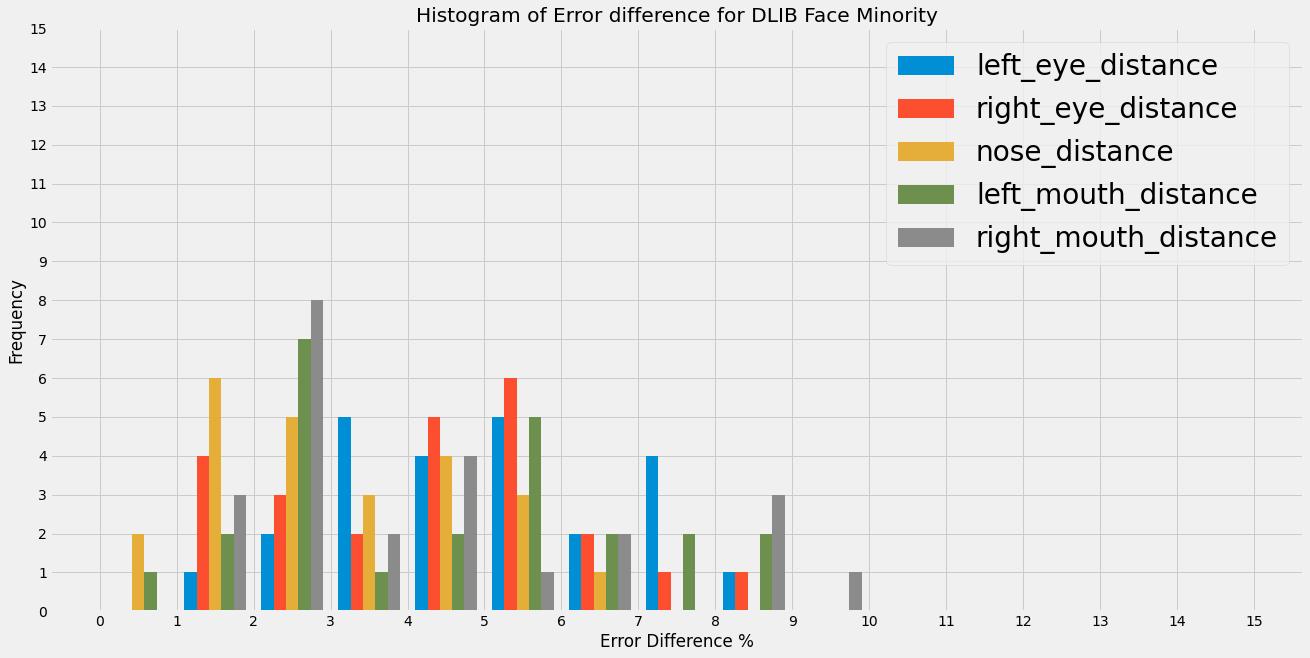

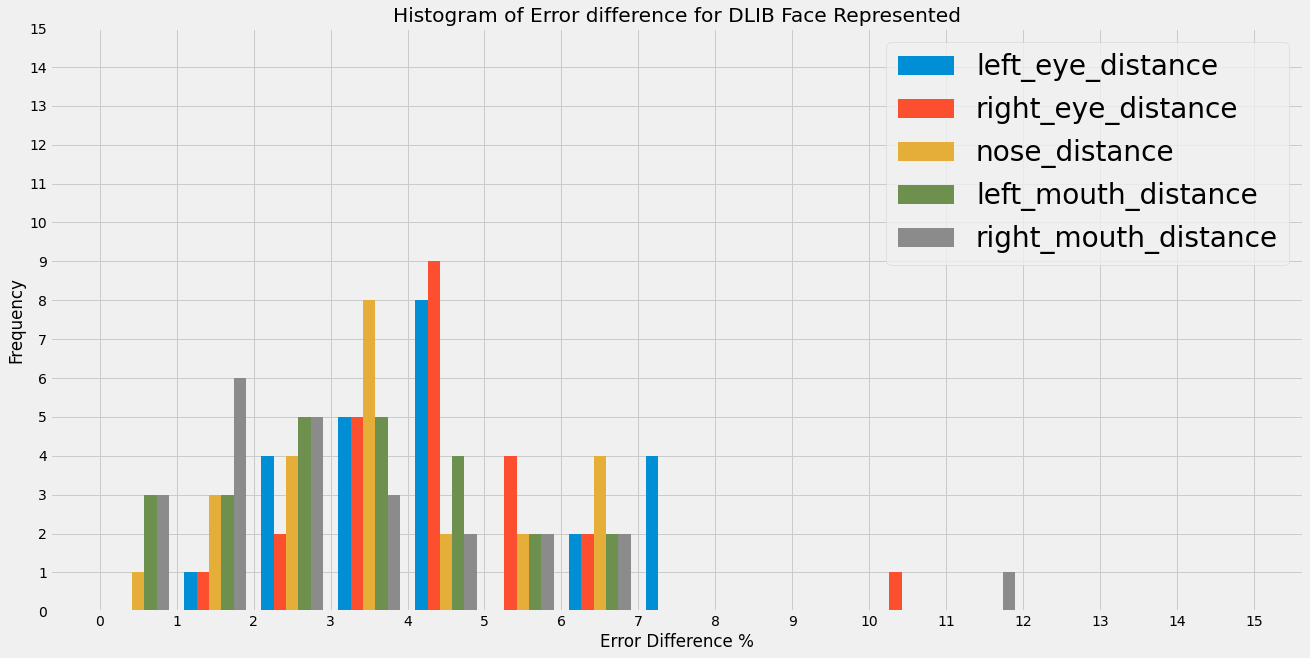

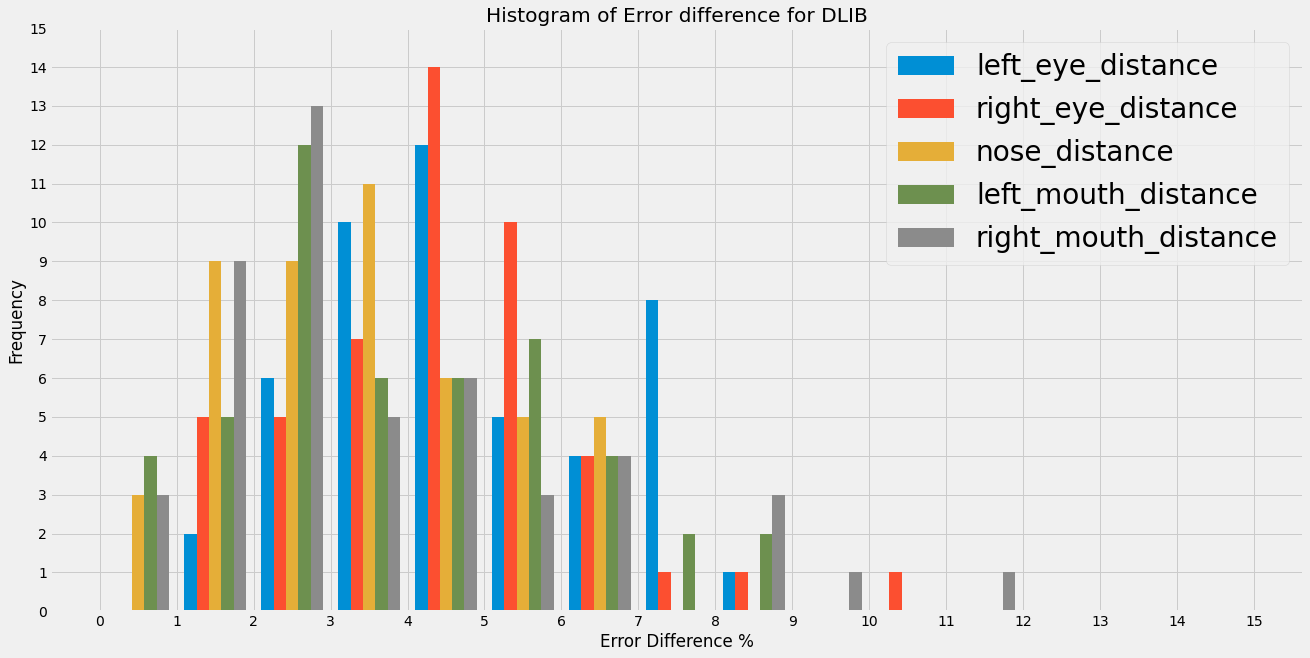

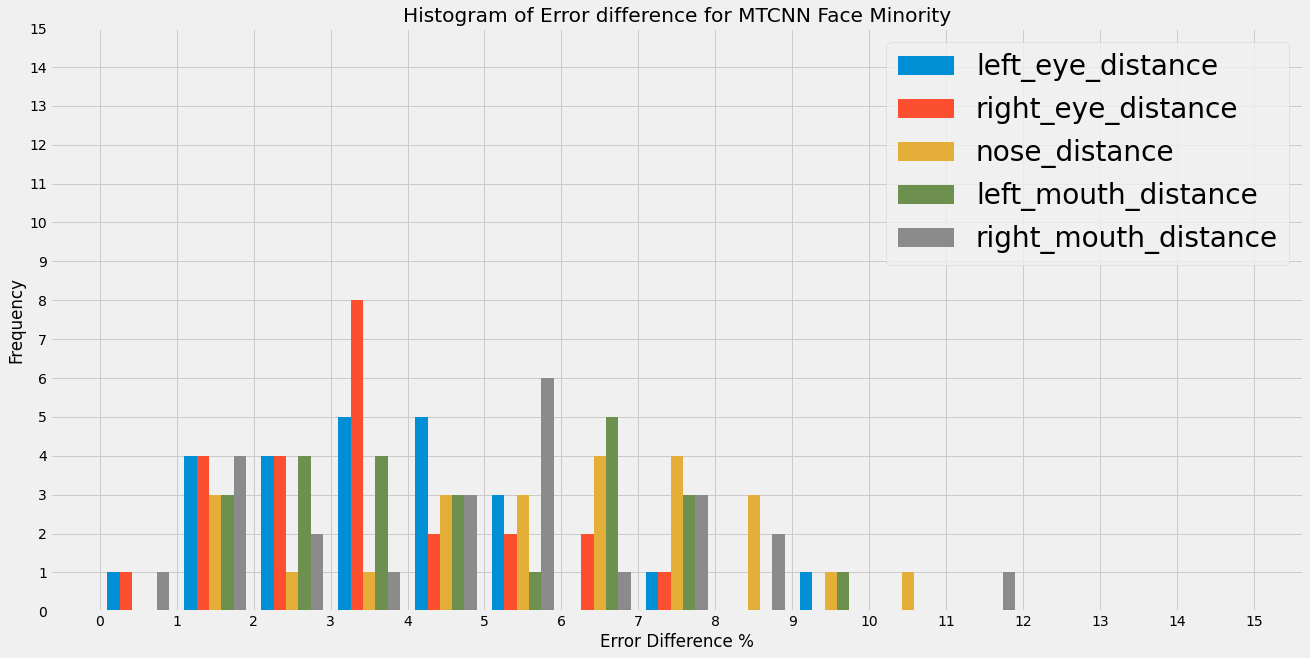

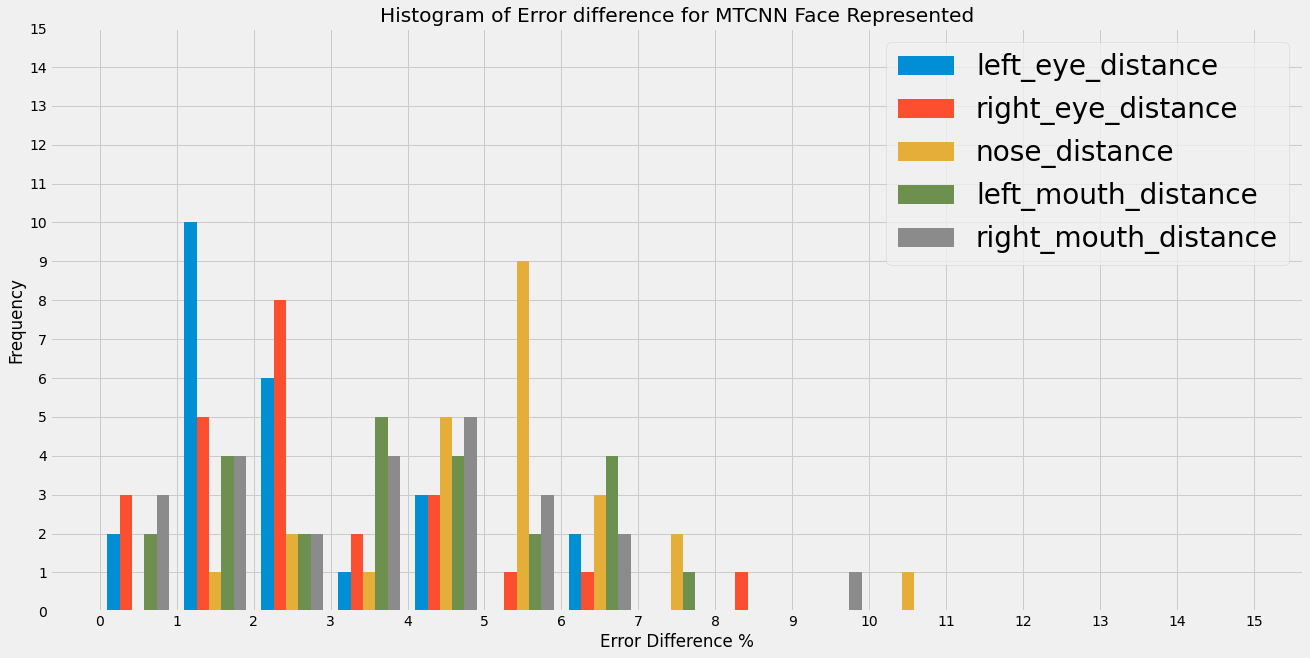

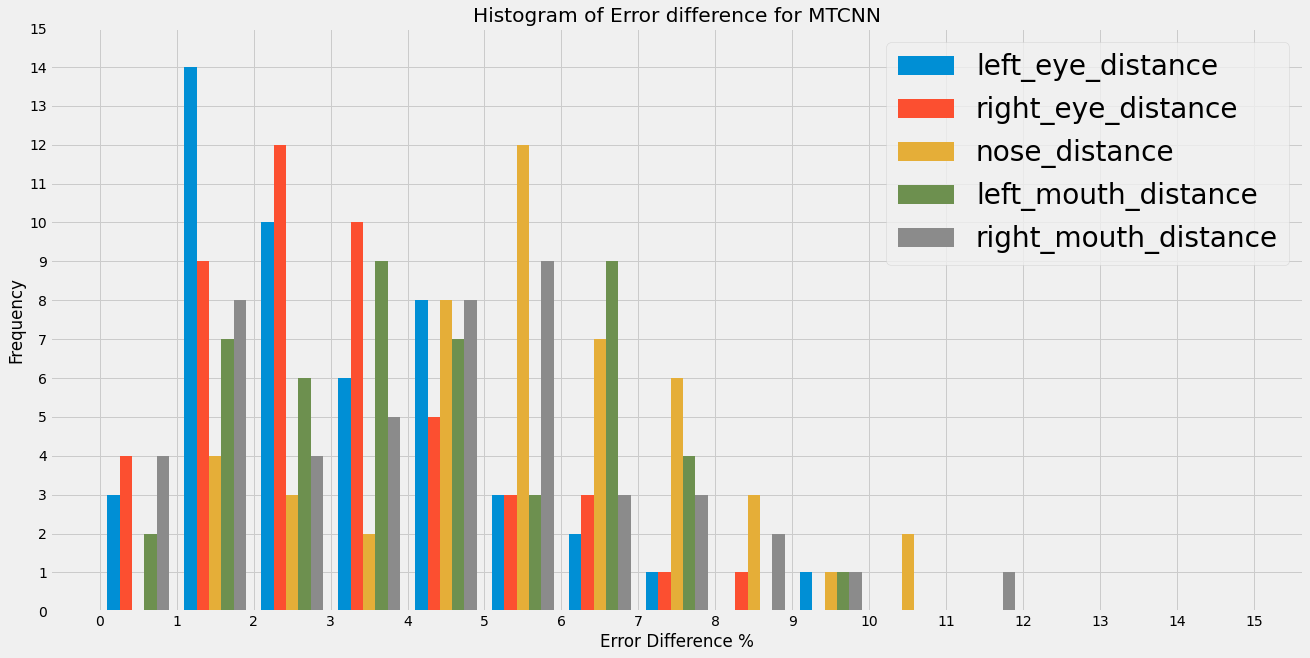

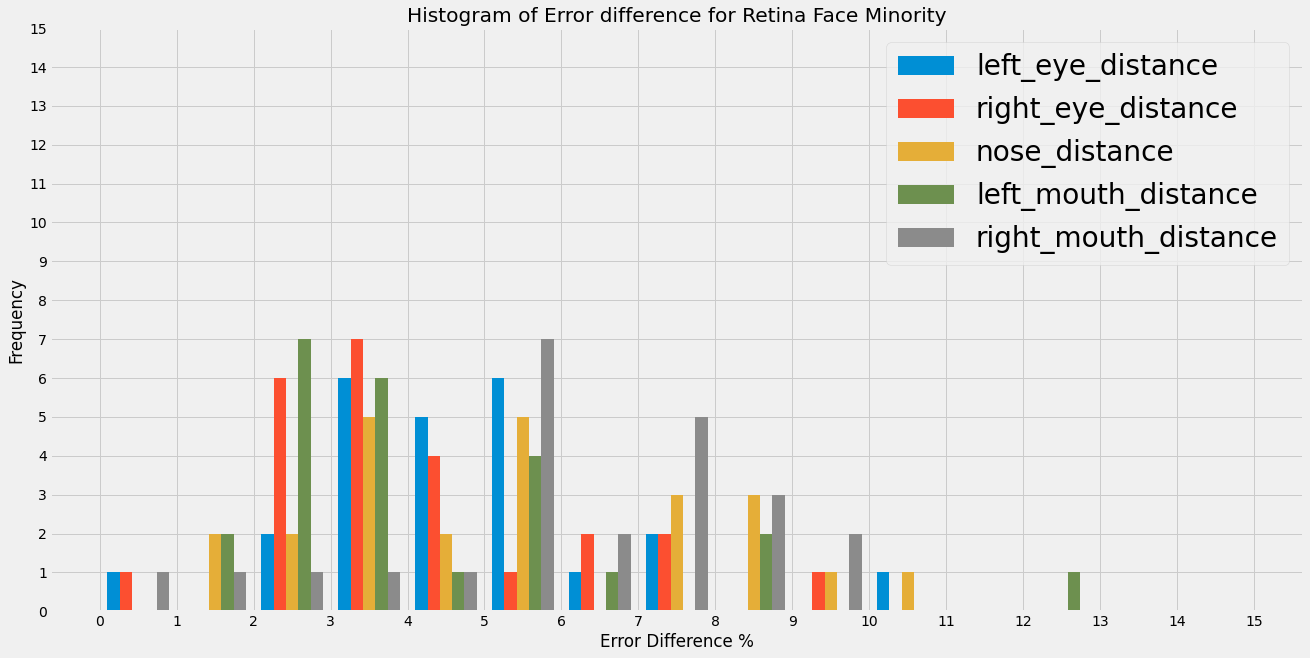

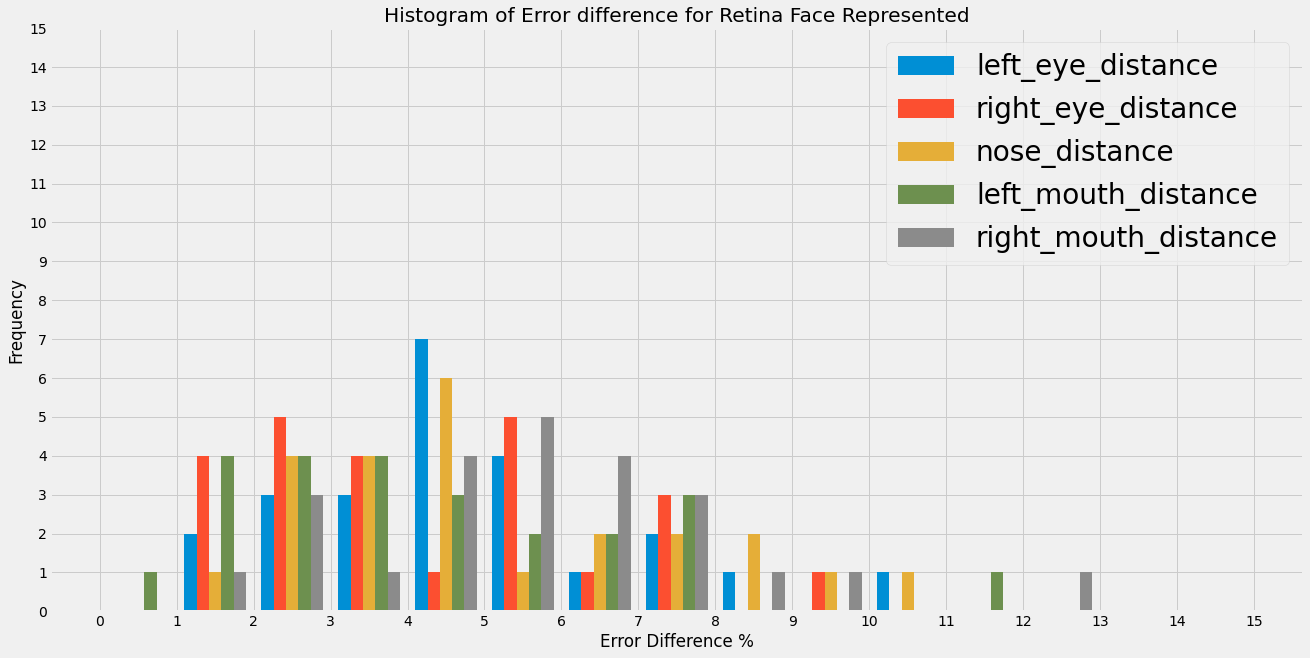

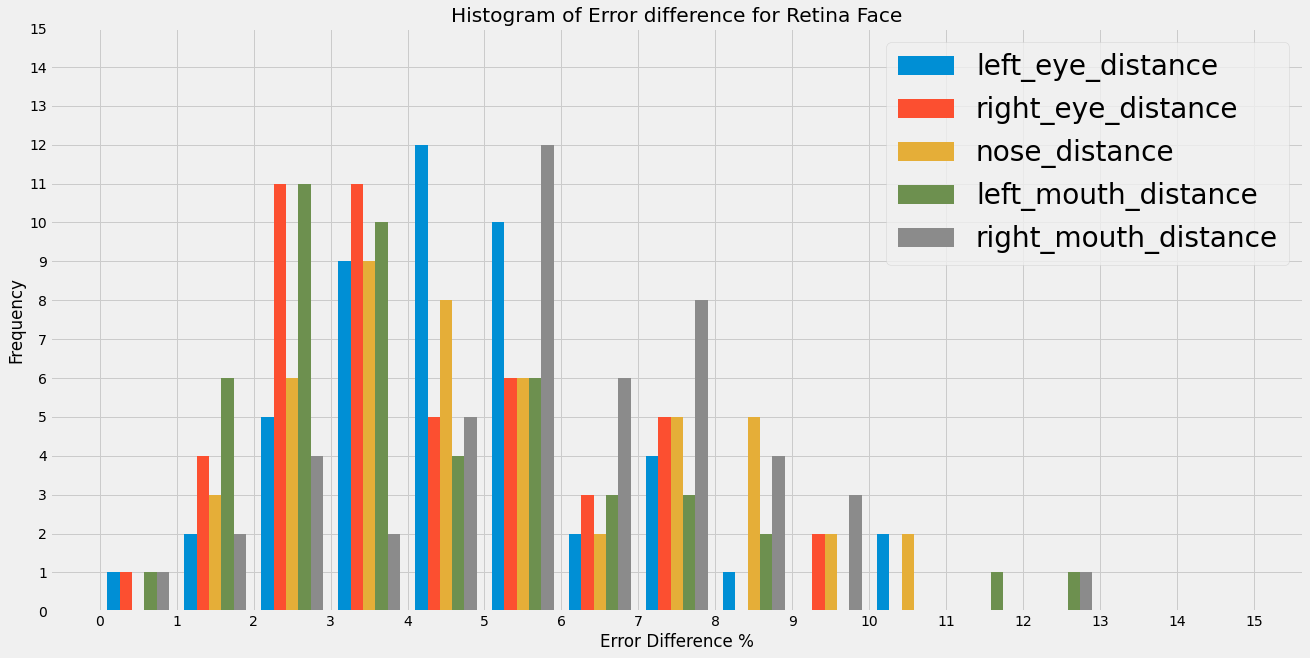

In [ ]:
histogram(dlib_error_list_m,"DLIB Face Minority")
histogram(dlib_error_list_r,"DLIB Face Represented")
histogram(dlib_error_list,"DLIB")

histogram(mtcnn_error_list_m,"MTCNN Face Minority")
histogram(mtcnn_error_list_r,"MTCNN Face Represented")
histogram(mtcnn_error_list,"MTCNN")

histogram(retinaface_error_list_m,"Retina Face Minority")
histogram(retinaface_error_list_r,"Retina Face Represented")
histogram(retinaface_error_list,"Retina Face")

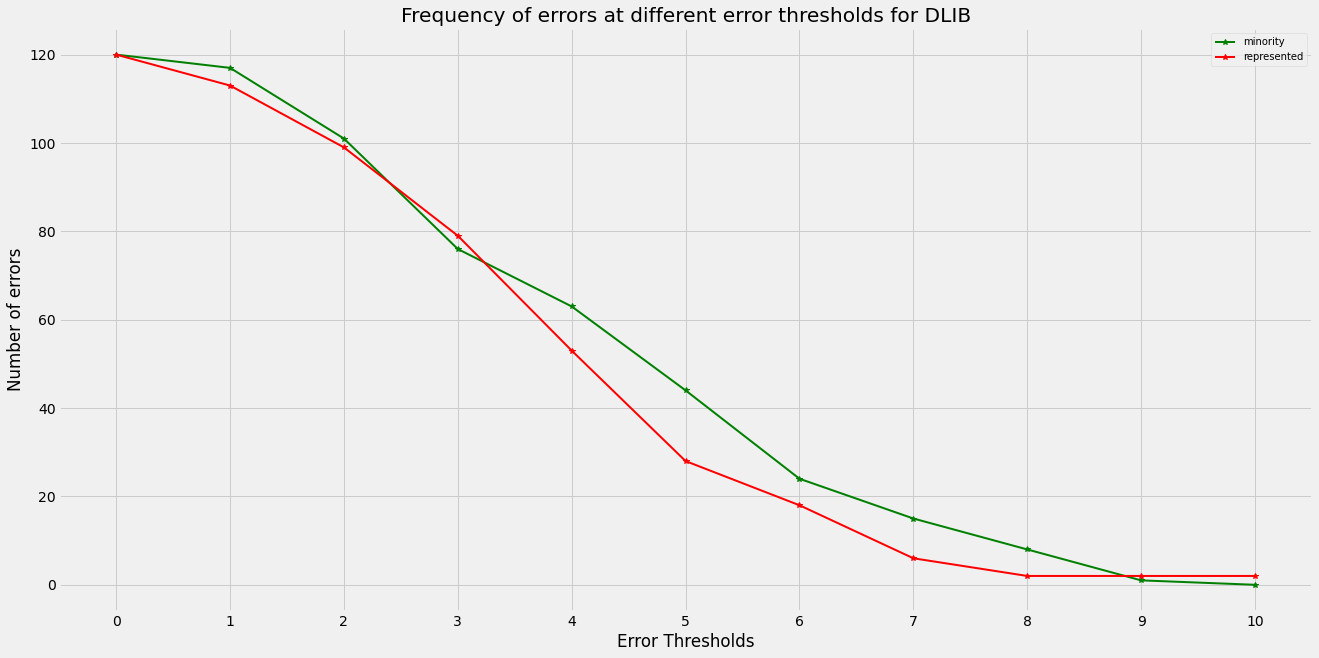

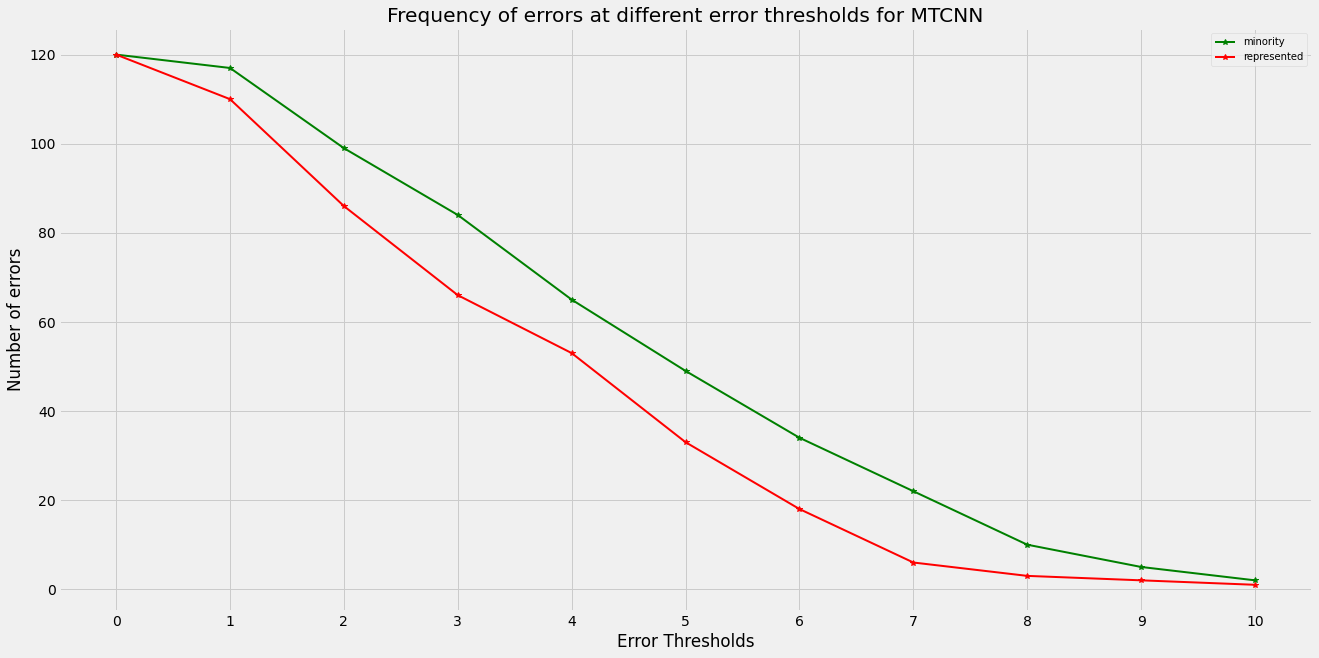

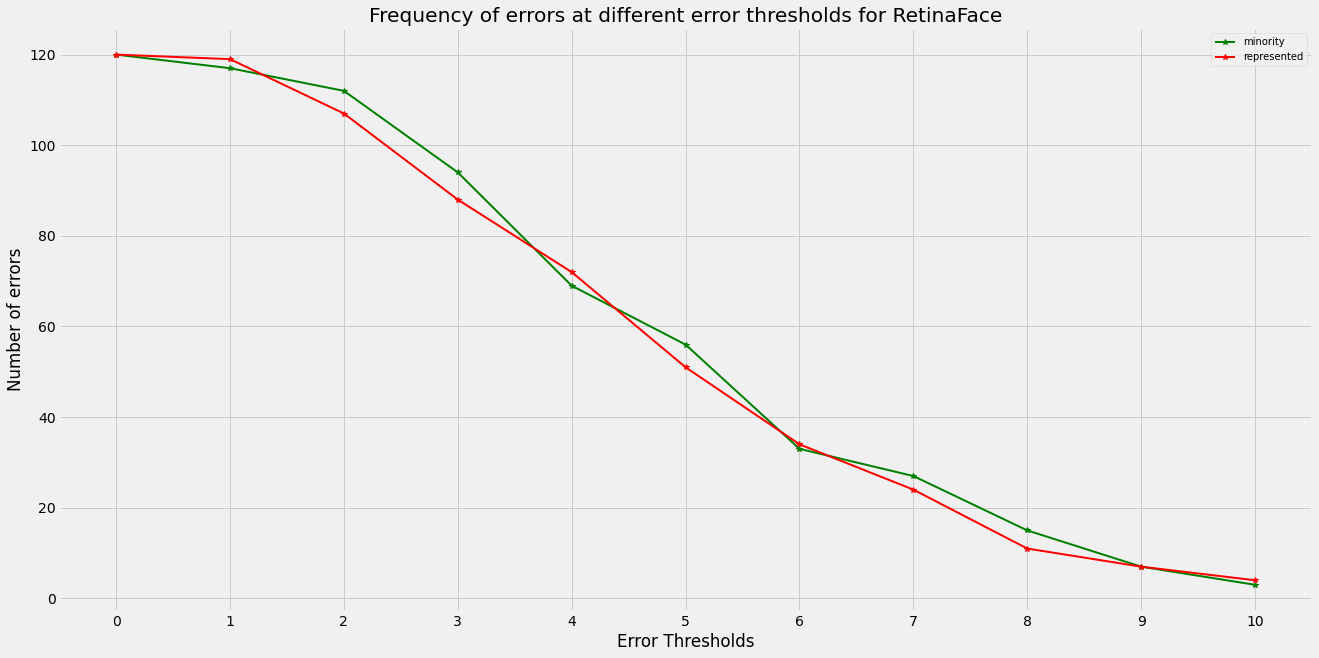

In [ ]:
errorThreshold(dlib_diff,"DLIB")
errorThreshold(mtcnn_diff,"MTCNN")
errorThreshold(retinaface_diff,"RetinaFace")

In [ ]:

print("Max Error for DLIB:", max_error(dlib_diff))
print("Max Error for MTCNN:",max_error(mtcnn_diff))
print("Max Error for RetinaFace:",max_error(retinaface_diff))

print("Min Error for DLIB:", min_error(dlib_diff))
print("Min Error for MTCNN:",min_error(mtcnn_diff))
print("Min Error for RetinaFace:",min_error(retinaface_diff))

Max Error for DLIB: 2
Max Error for MTCNN: 6
Max Error for RetinaFace: 4
Min Error for DLIB: 21
Min Error for MTCNN: 16
Min Error for RetinaFace: 0


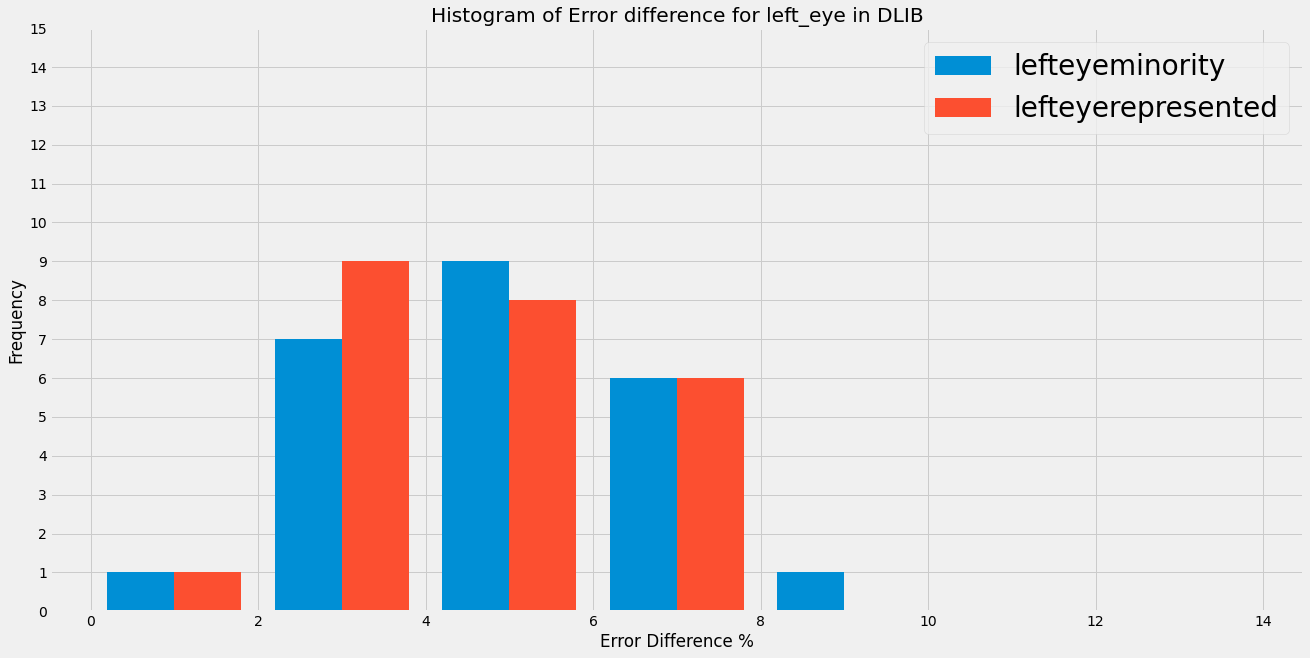

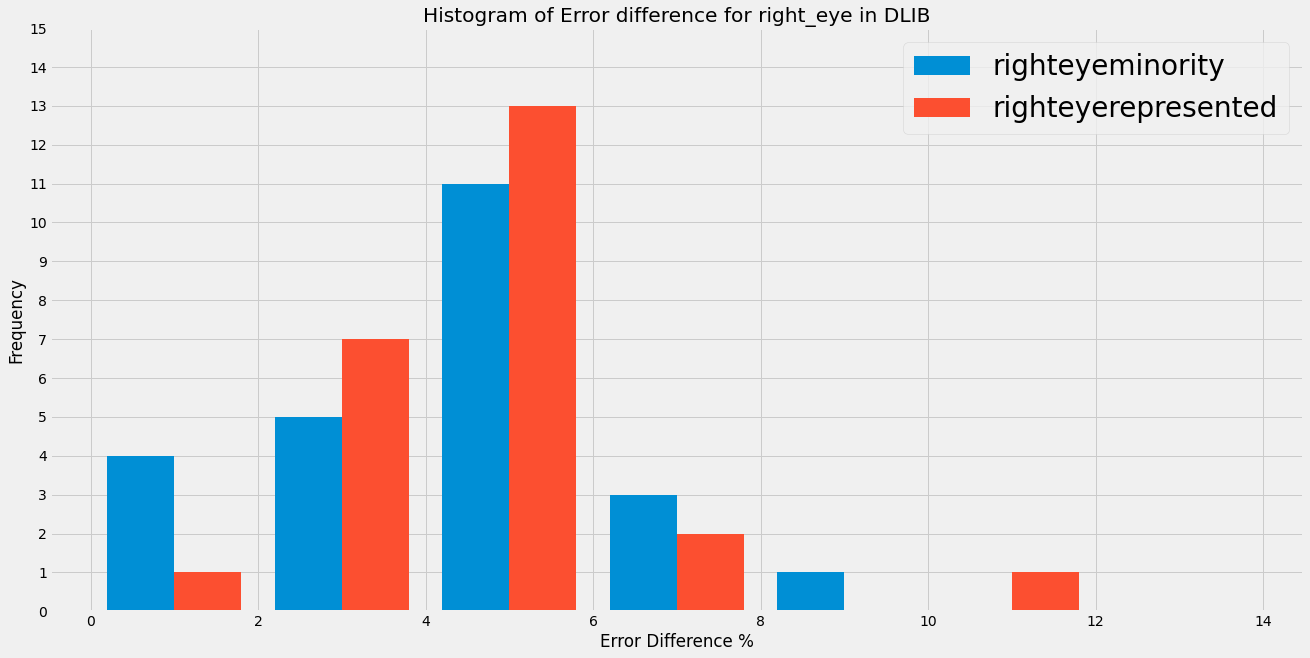

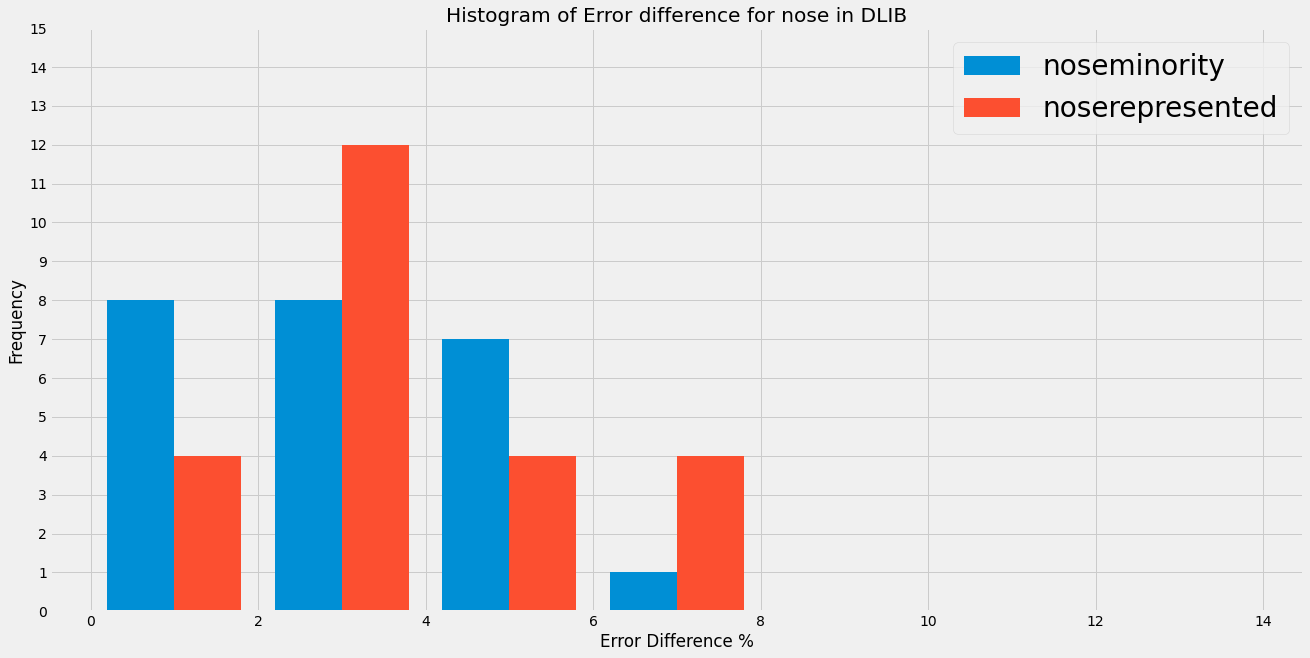

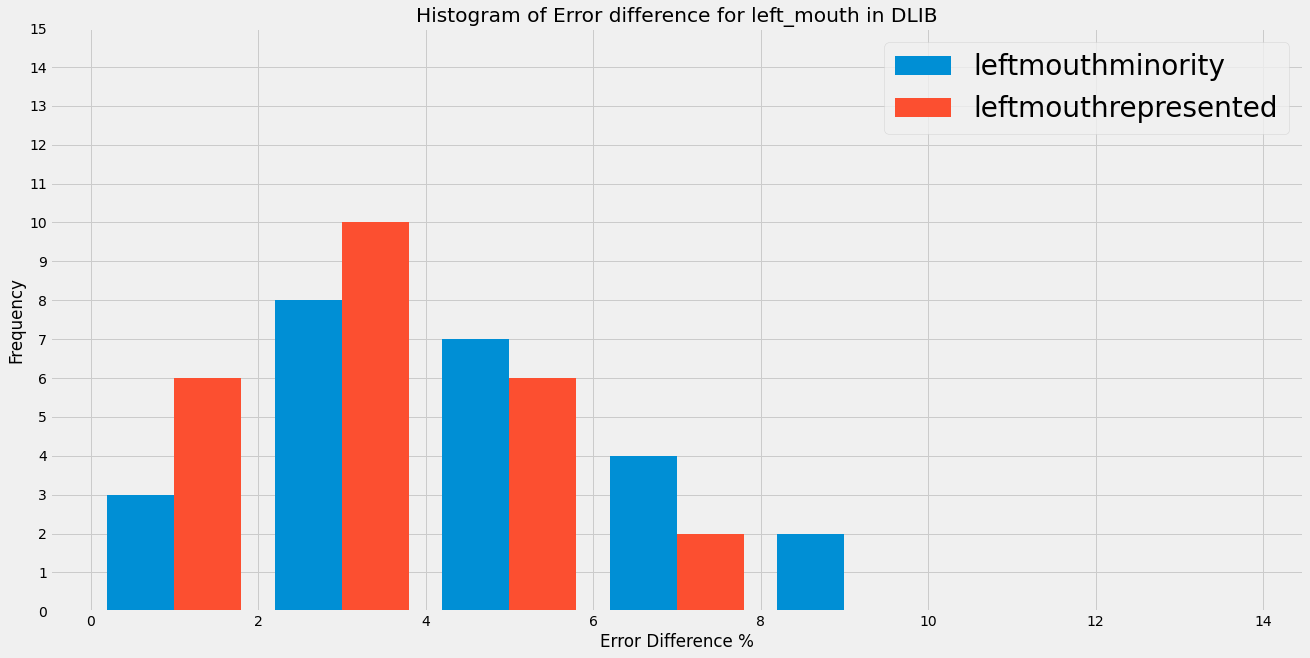

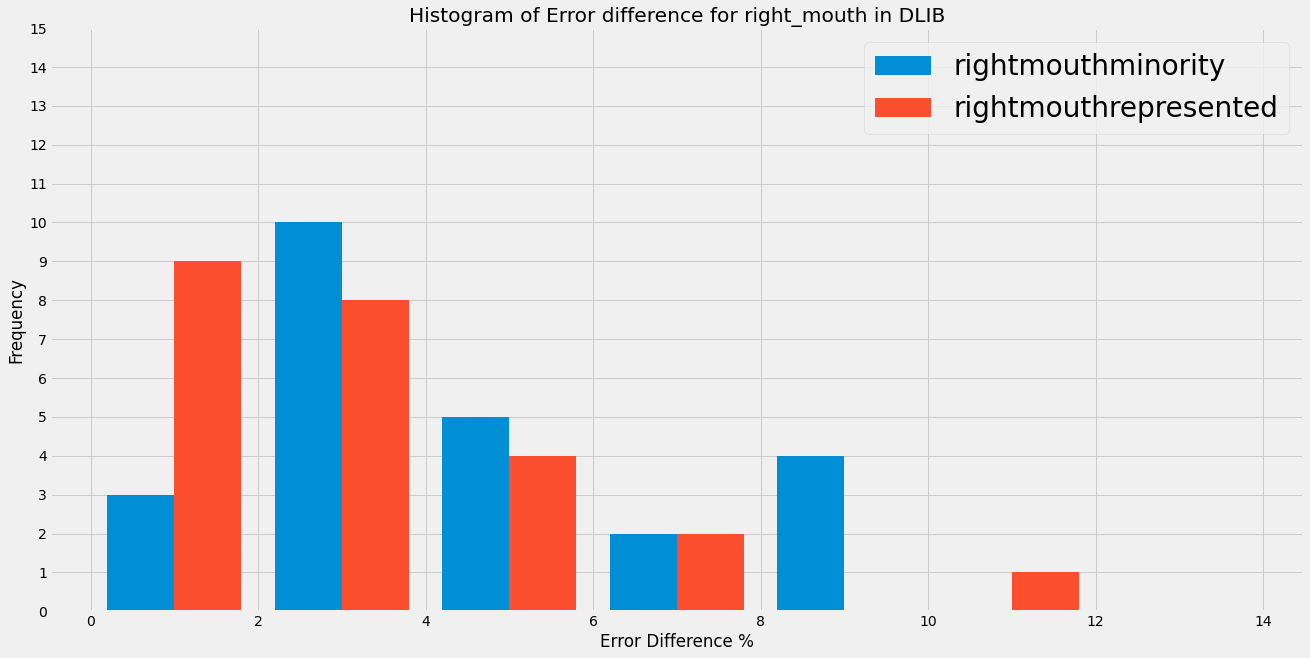

In [ ]:
histogramSpecific("left_eye_distance","left_eye in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_eye_distance","right_eye in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("nose_distance","nose in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in DLIB",dlib_error_list_m,dlib_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in DLIB",dlib_error_list_m,dlib_error_list_r)

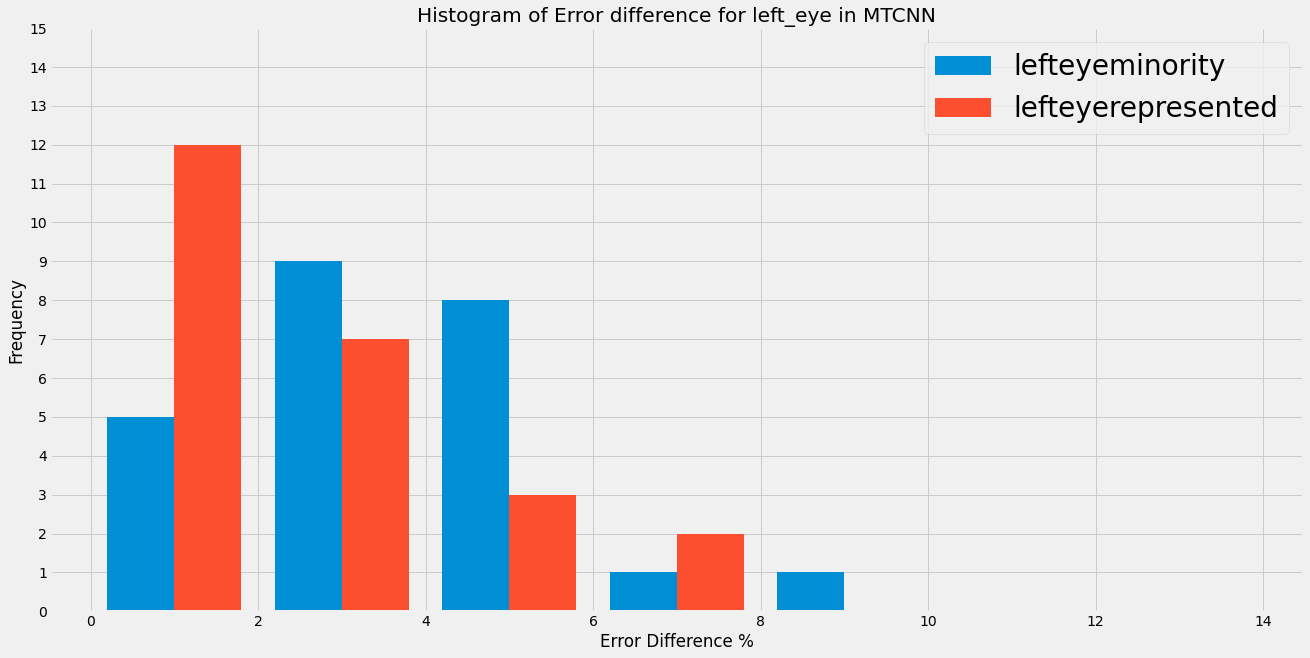

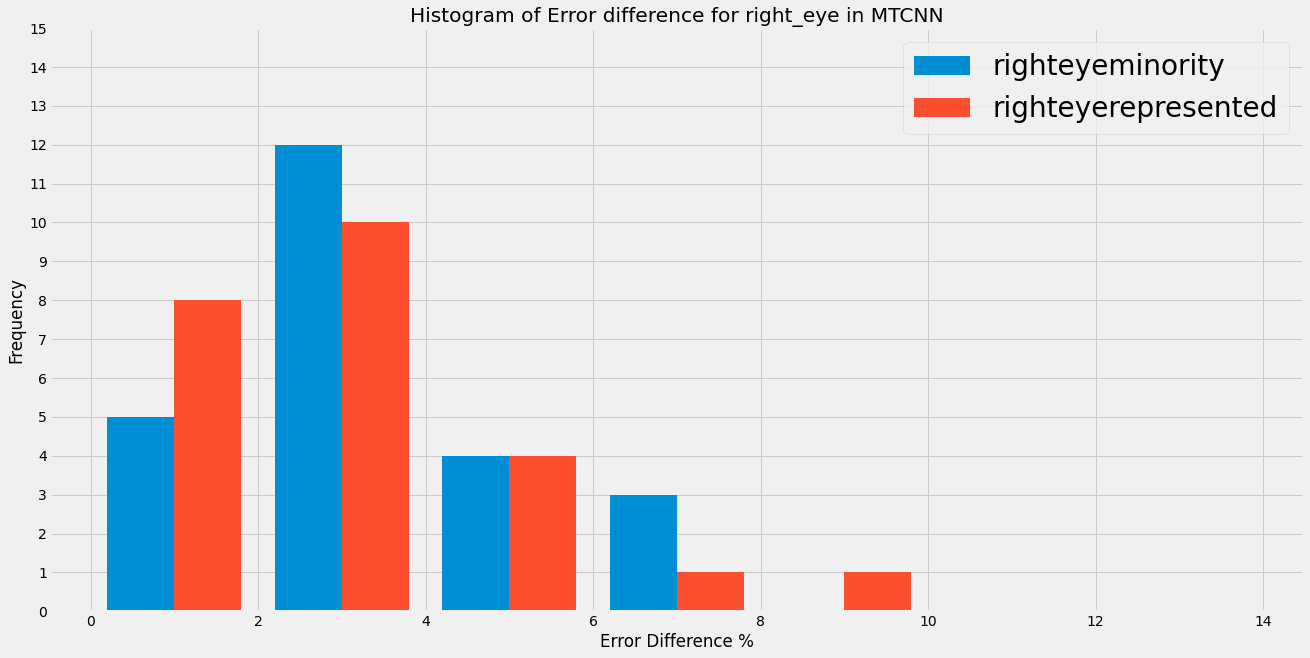

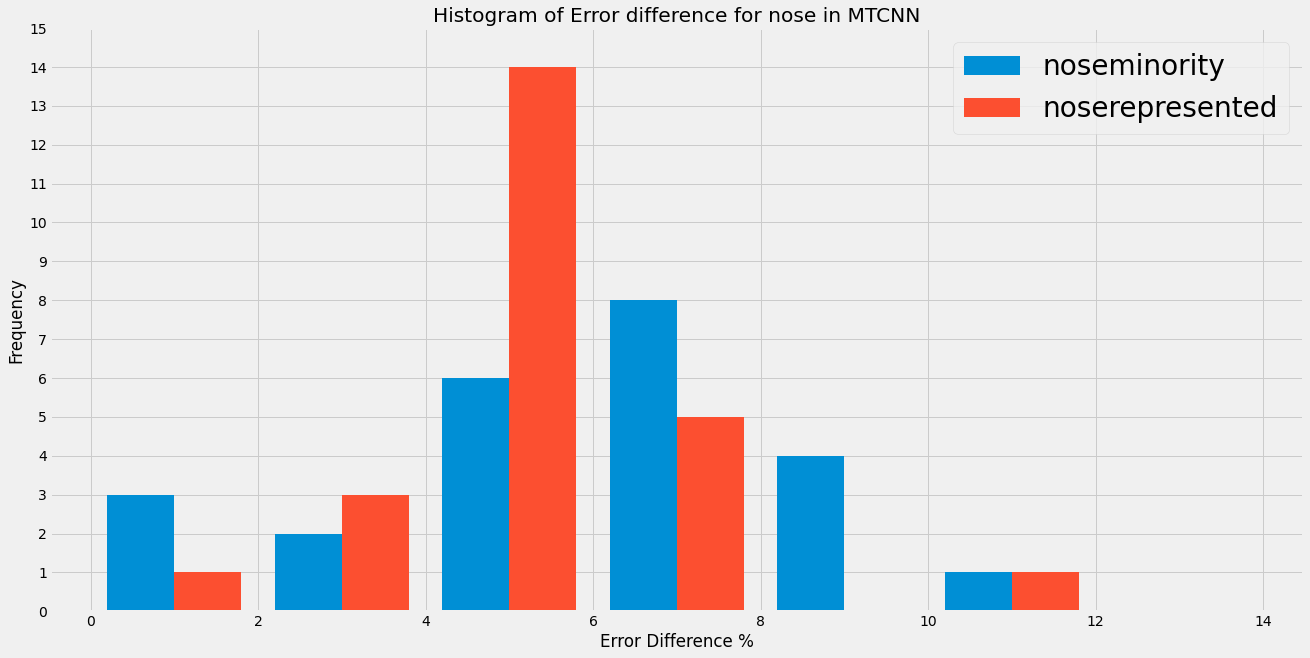

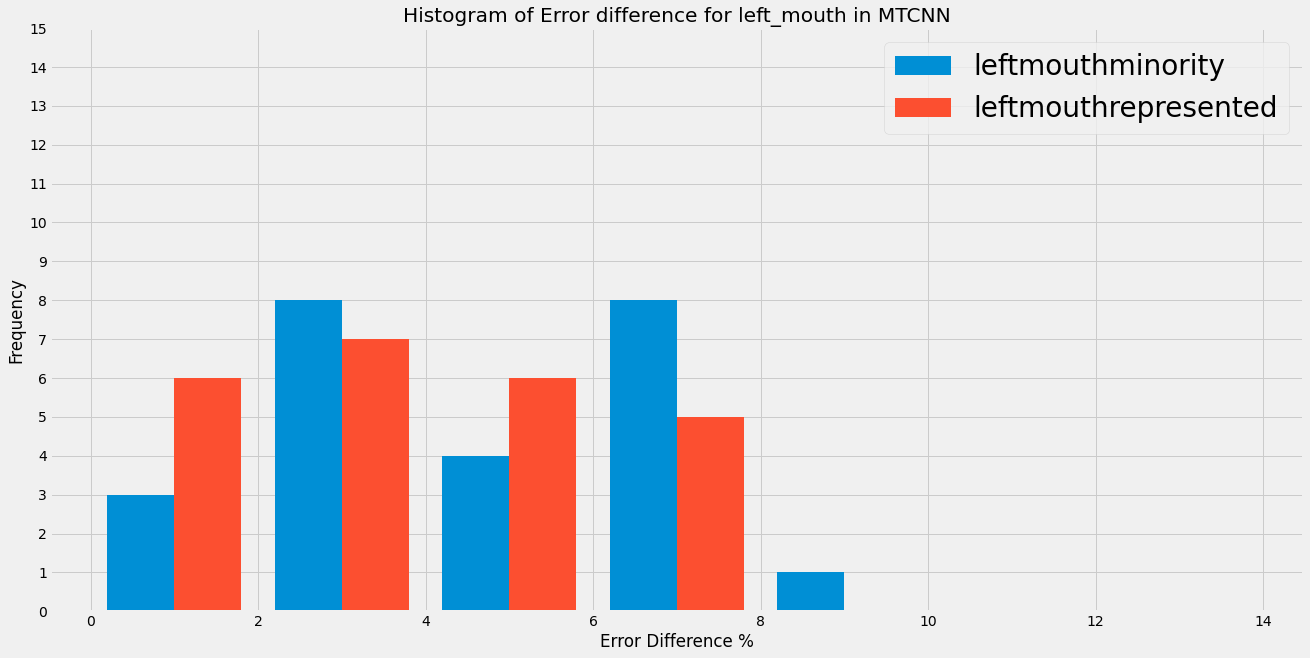

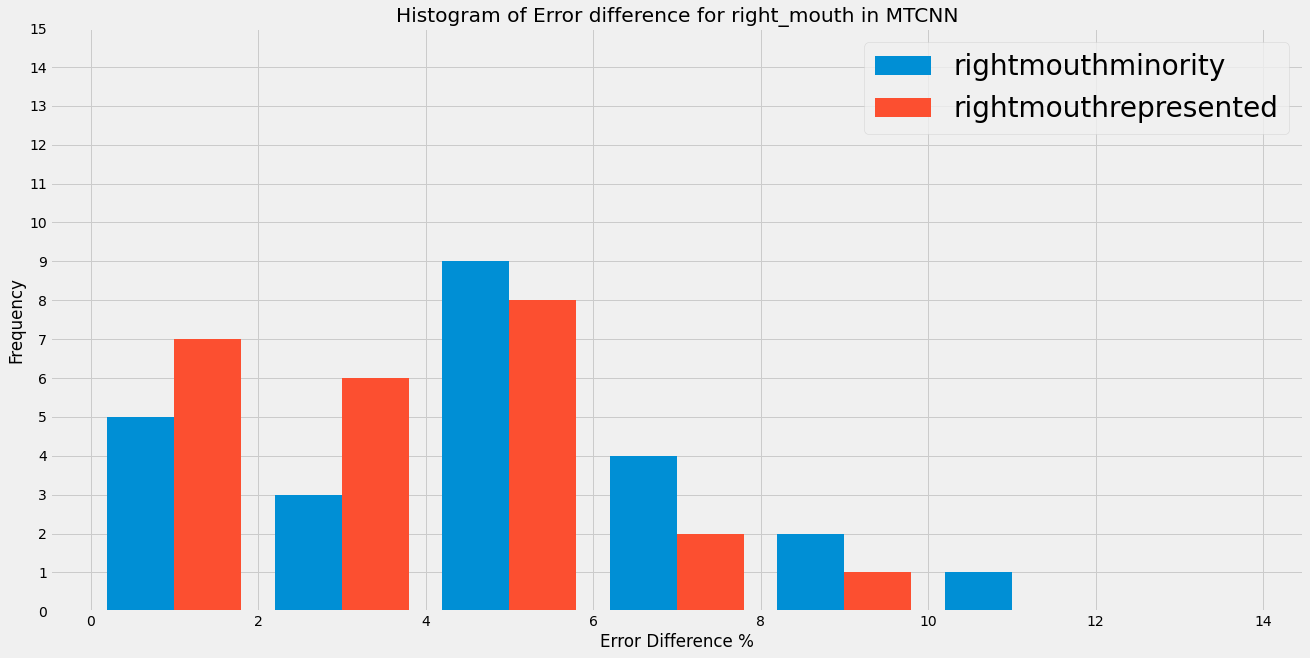

In [ ]:
histogramSpecific("left_eye_distance","left_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_eye_distance","right_eye in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("nose_distance","nose in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in MTCNN",mtcnn_error_list_m,mtcnn_error_list_r)

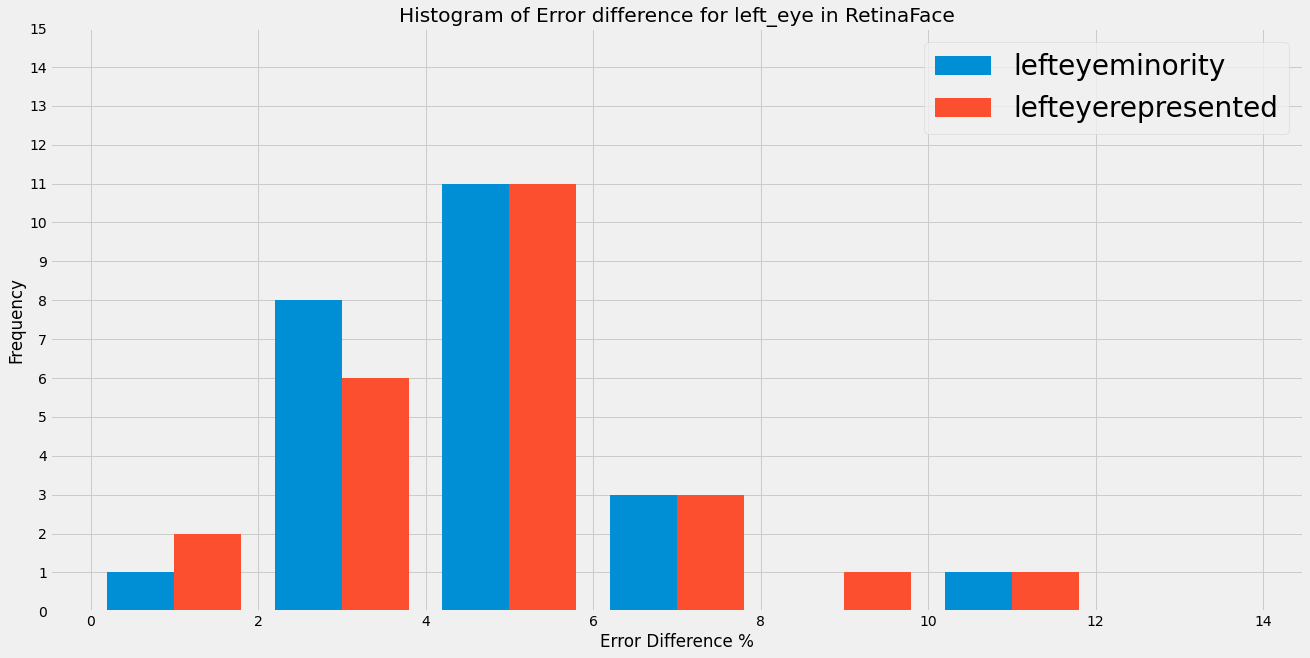

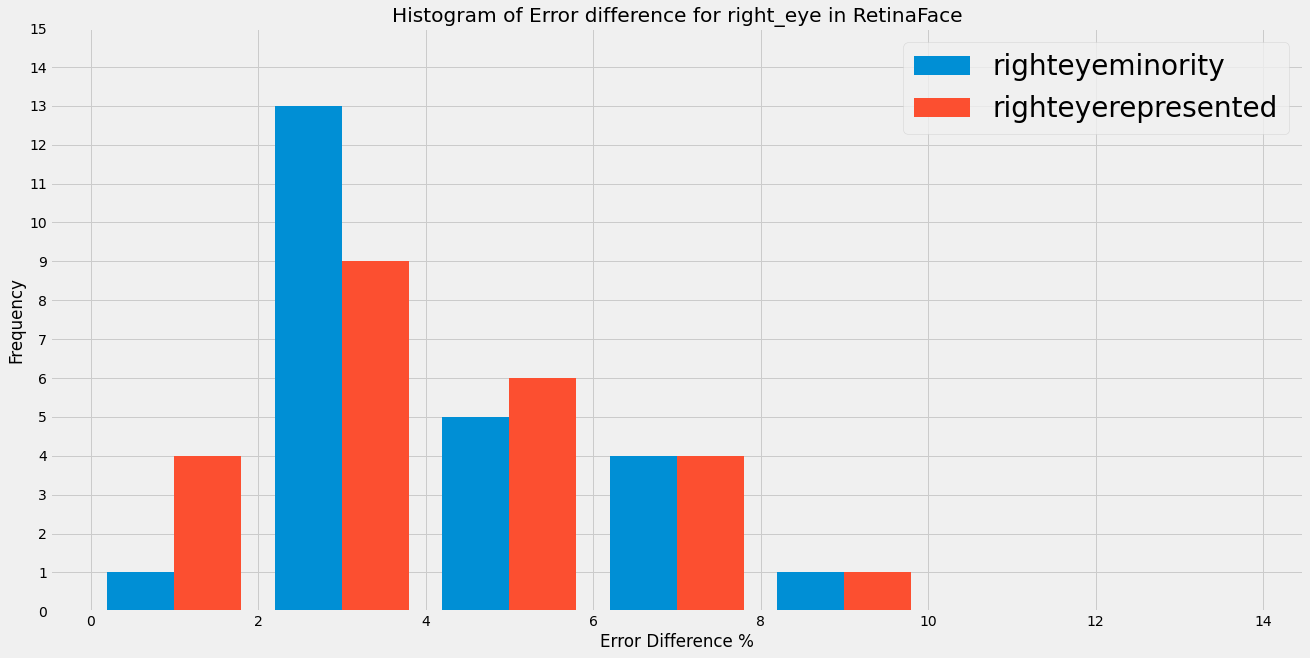

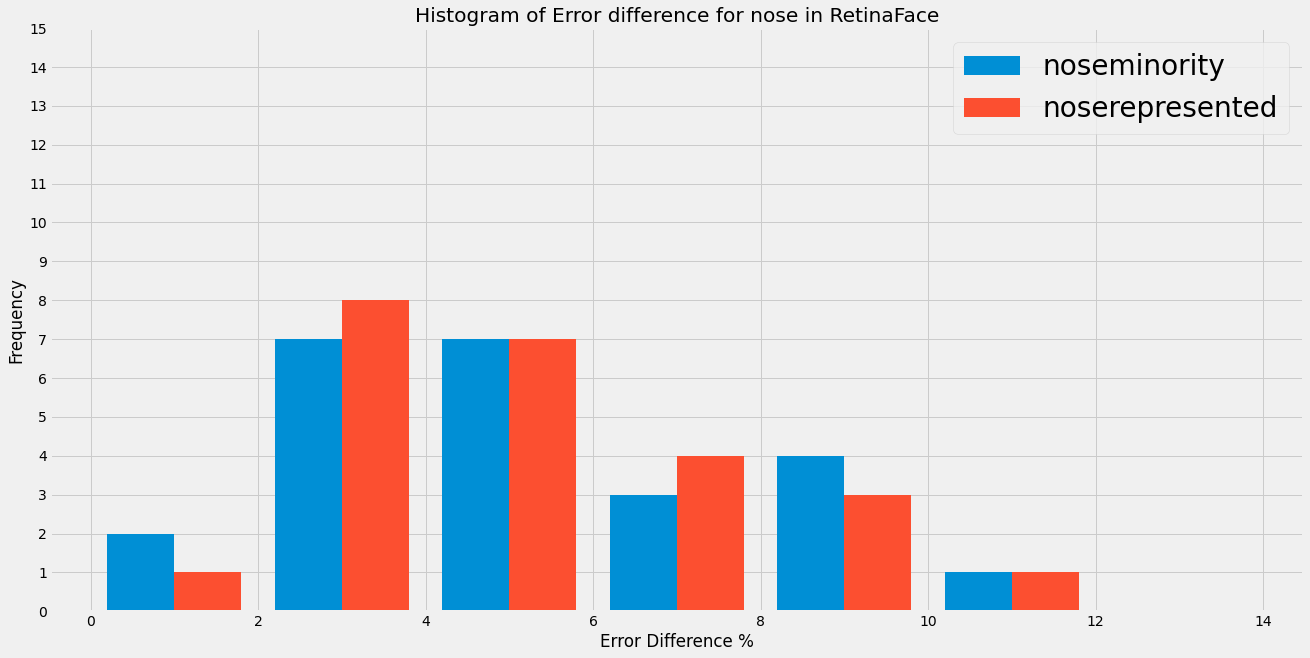

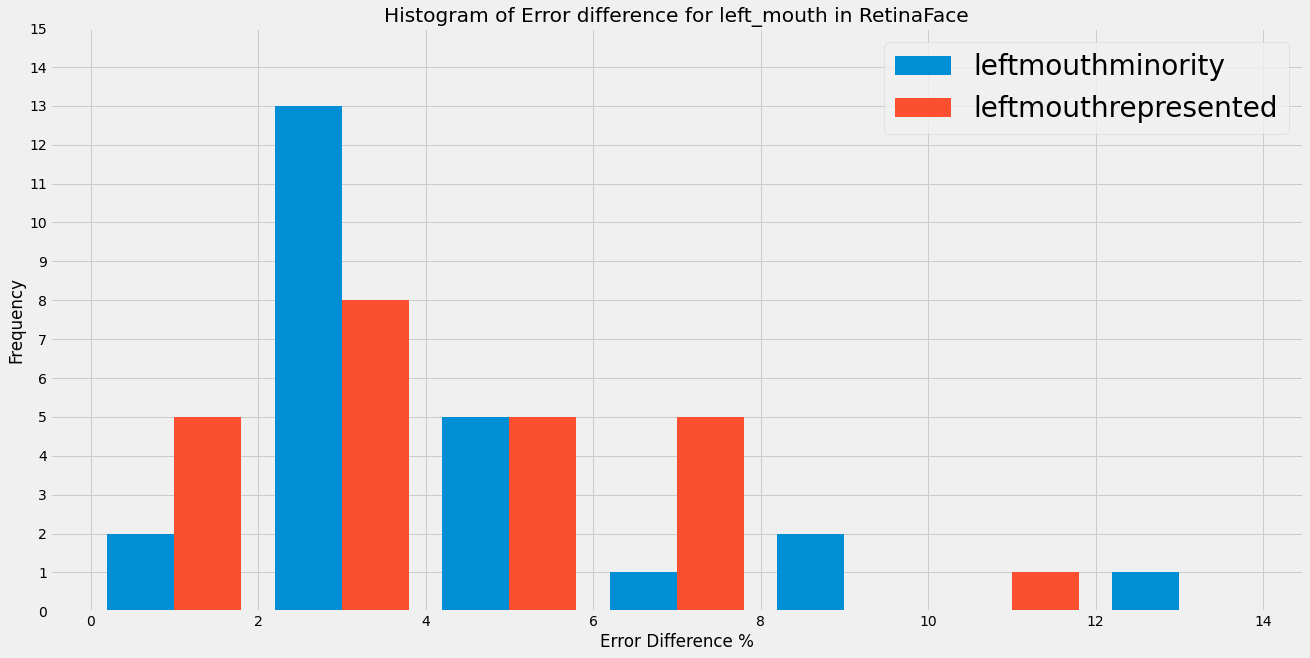

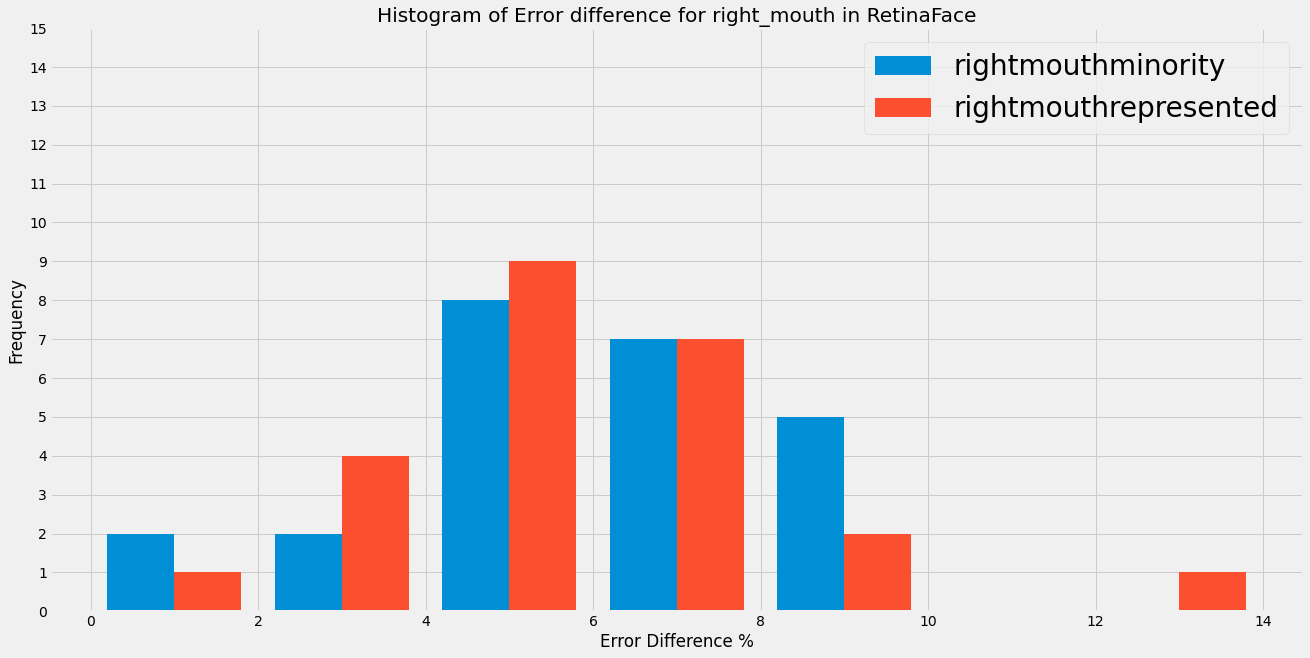

In [ ]:
histogramSpecific("left_eye_distance","left_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_eye_distance","right_eye in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("nose_distance","nose in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("left_mouth_distance","left_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)
histogramSpecific("right_mouth_distance","right_mouth in RetinaFace",retinaface_error_list_m,retinaface_error_list_r)

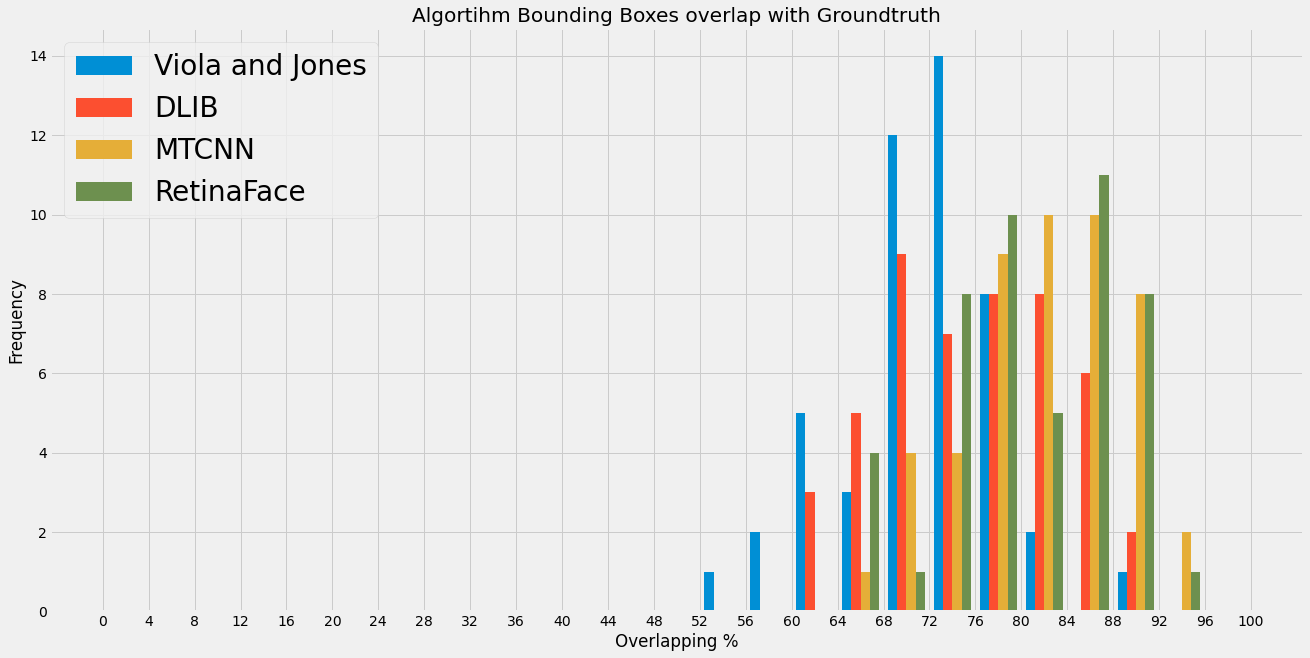

In [ ]:
mtcnn_overlap = (overlap(mtcnn_annotated))
dlib_overlap = (overlap(dlib_annotated))
retinaface_overlap = (overlap(retinanet_annotated))
violajones_overlap = (overlap_viola(violajones_annotated))
histogram_bounding(violajones_overlap,dlib_overlap,mtcnn_overlap,retinaface_overlap)

In [ ]:
dlib_overlap_m,dlib_overlap_r = split_m_r(dlib_overlap)
mtcnn_overlap_m,mtcnn_overlap_r = split_m_r(mtcnn_overlap)
retinaface_overlap_m,retinaface_overlap_r = split_m_r(retinaface_overlap)
violajones_overlap_m,violajones_overlap_r = split_m_r(violajones_overlap)


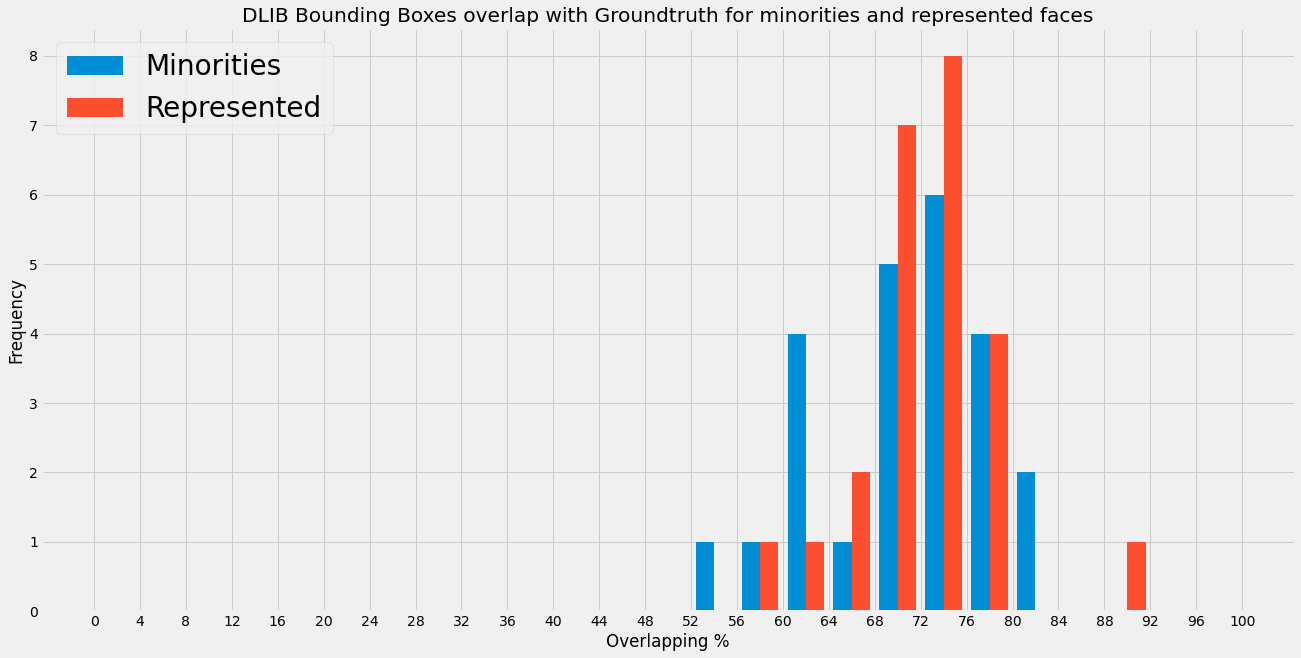

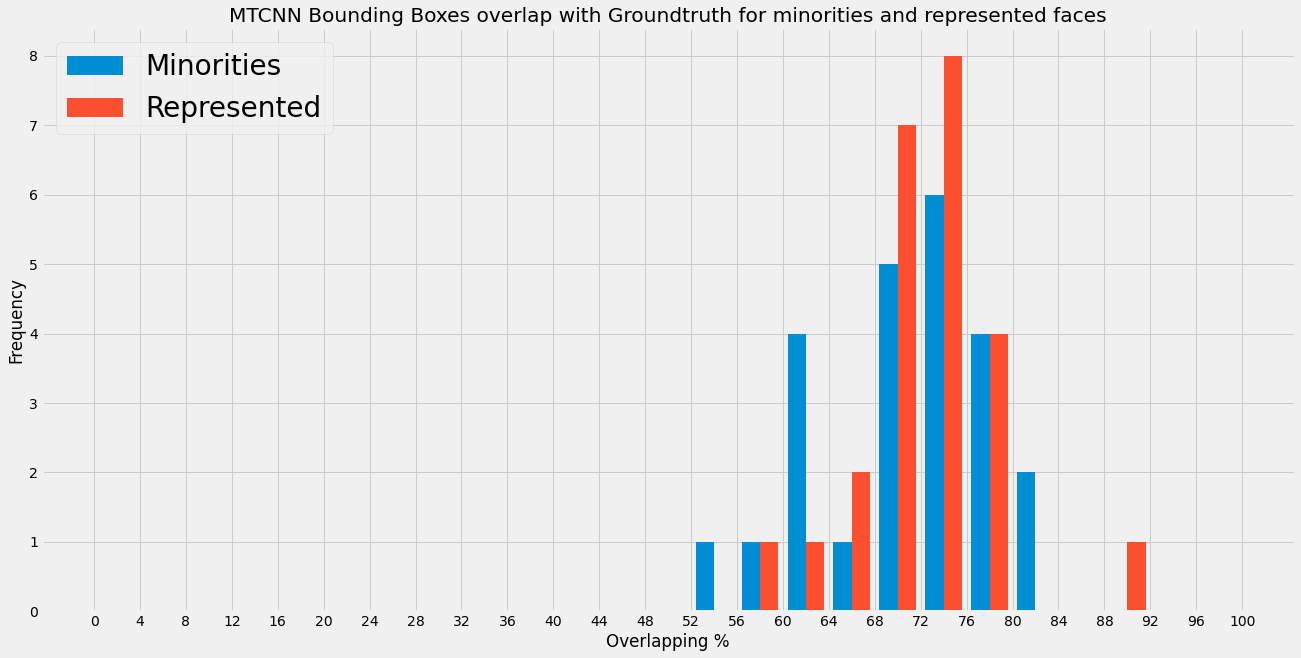

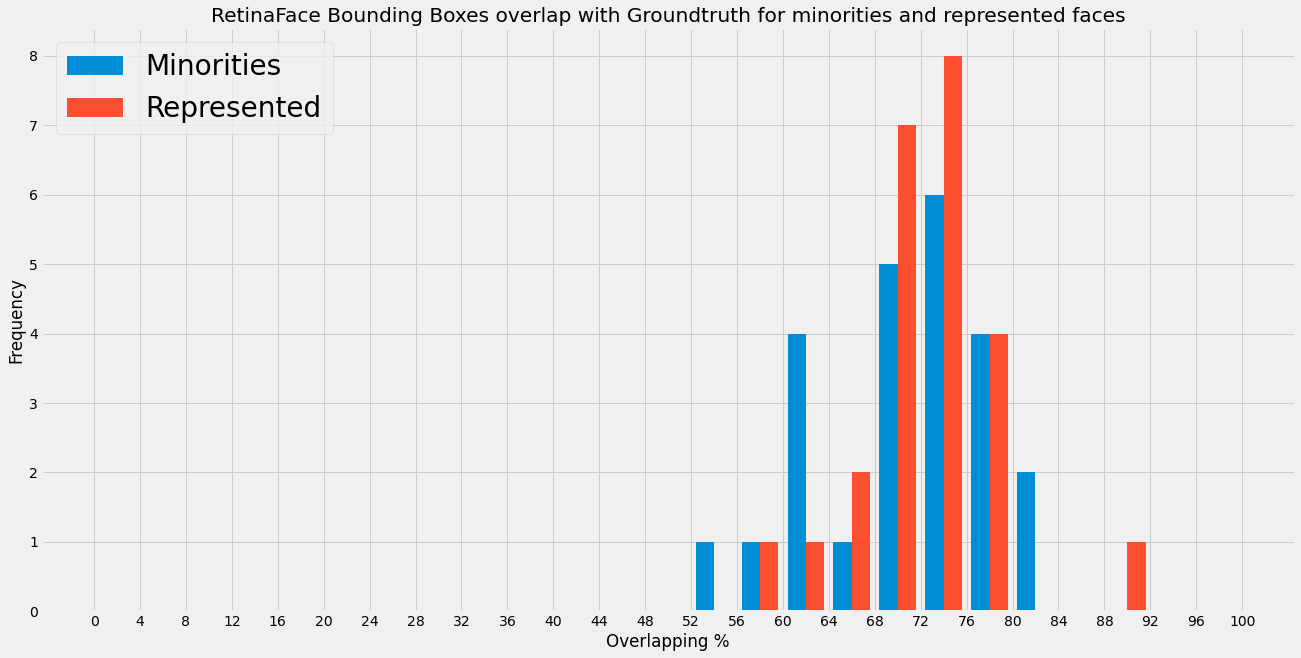

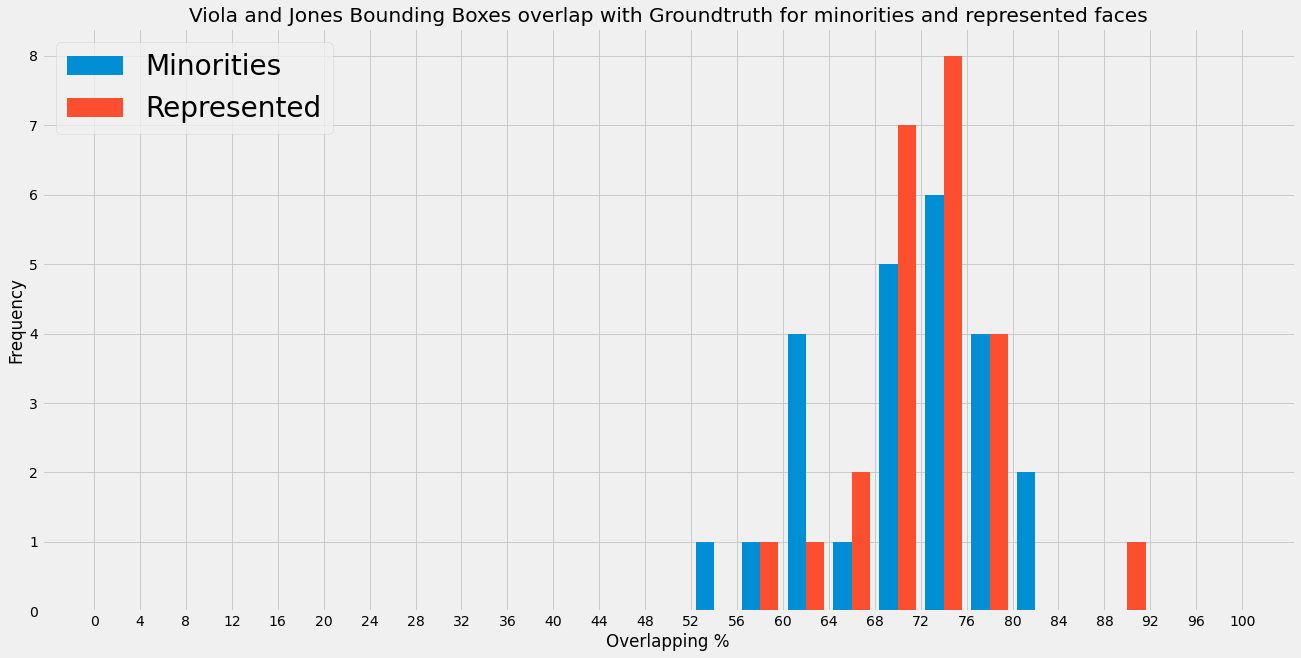

In [ ]:
histogram_overlap_mr(dlib_overlap_m,dlib_overlap_r,"DLIB")
histogram_overlap_mr(mtcnn_overlap_m,mtcnn_overlap_r,"MTCNN")
histogram_overlap_mr(retinaface_overlap_m,retinaface_overlap_r,"RetinaFace")
histogram_overlap_mr(violajones_overlap_m,violajones_overlap_r,"Viola and Jones")

In [ ]:
print("DLIB Average:")
m,r = average_diff(dlib_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")
print("---------------------------------------")
print("MTCNN Average:")
m,r = average_diff(mtcnn_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")
print("---------------------------------------")
print("RetinaFace Average:")
m,r = average_diff(retinaface_diff)
print("\nMinority:",m, "\nRepresented:",r,"\n")

DLIB Average:

Average Minority:
left_eye_distance: 5.08824897178686
right_eye_distance: 4.3339984262882165
nose_distance: 3.0852427208059185
left_mouth_distance: 4.514058445991387
right_mouth_distance: 4.208081770009548

Average Represented:
left_eye_distance: 4.5096338412658
right_eye_distance: 4.535781897626928
nose_distance: 3.703980102366735
left_mouth_distance: 3.1564029175368042
right_mouth_distance: 3.2335425933011703

Minority: 4.245926066976387 
Represented: 3.827868270419487 

---------------------------------------
MTCNN Average:

Average Minority:
left_eye_distance: 3.735669397446537
right_eye_distance: 3.5193043222786122
nose_distance: 5.847261781356541
left_mouth_distance: 4.63975073055714
right_mouth_distance: 4.954682693324773

Average Represented:
left_eye_distance: 2.5357625602518628
right_eye_distance: 2.947397704795543
nose_distance: 5.363823823434996
left_mouth_distance: 3.8330926961448153
right_mouth_distance: 3.649913817202634

Minority: 4.5393337849927216 
Repr

In [ ]:
set_0 = np.random.randint(low = 0, high = 48, size = 36) 
set_1 = np.random.randint(low = 0, high = 48, size = 36) 
set_2 = np.random.randint(low = 0, high = 48, size = 36) 
set_3 = np.random.randint(low = 0, high = 48, size = 36) 
set_4 = np.arange(48)

In [ ]:
print("DLIB")
dlib_sd = standarddeviation(dlib_diff,set_0,set_1,set_2,set_3)
print("---------------------------------------")
print("MTCNN")
mtcnn_sd = standarddeviation(mtcnn_diff,set_0,set_1,set_2,set_3)
print("---------------------------------------")
print("RetinaFace")
retinaface_sd = standarddeviation(retinaface_diff,set_0,set_1,set_2,set_3)

DLIB
left_eye_distance: 4.851224368091328 +/- 0.24617838231651015 	right_eye_distance: 4.564311298186177 +/- 0.13168178970451988
nose_distance: 3.2521946071201993 +/- 0.15169658048245188
left_mouth_distance: 3.8467264122101468 +/- 0.09261302120643639 	right_mouth_distance: 3.762417659349939 +/- 0.4363290848582223

---------------------------------------
MTCNN
left_eye_distance: 3.026829861724886 +/- 0.1959905172545435 	right_eye_distance: 3.1800243009453295 +/- 0.2014881957121046
nose_distance: 5.470331075012053 +/- 0.39229690427944613
left_mouth_distance: 3.9200673378321564 +/- 0.24873189951796376 	right_mouth_distance: 4.303837333734033 +/- 0.4201608948733553

---------------------------------------
RetinaFace
left_eye_distance: 4.614749136031215 +/- 0.18179608999839297 	right_eye_distance: 4.200364778336848 +/- 0.31081759357429845
nose_distance: 5.0341232190807315 +/- 0.4145088743410616
left_mouth_distance: 4.212966689717056 +/- 0.3187425094956859 	right_mouth_distance: 5.6158667215

In [ ]:
dlib_m,dlib_r = split_diff_m_r(dlib_diff)
mtcnn_m,mtcnn_r = split_diff_m_r(mtcnn_diff)
retinaface_m,retinaface_r = split_diff_m_r(retinaface_diff)


In [ ]:

print("DLIB")
dlib_sd = standarddeviation(dlib_diff,set_4,set_4,set_4,set_4)
print("---------------------------------------")
print("MTCNN")
mtcnn_sd = standarddeviation(mtcnn_diff,set_4,set_4,set_4,set_4)
print("---------------------------------------")
print("RetinaFace")
retinaface_sd = standarddeviation(retinaface_diff,set_4,set_4,set_4,set_4)

DLIB
left_eye_distance: 4.798941406526329 +/- 0.0 	right_eye_distance: 4.434890161957573 +/- 0.0
nose_distance: 3.394611411586327 +/- 0.0
left_mouth_distance: 3.835230681764095 +/- 0.0 	right_mouth_distance: 3.7208121816553583 +/- 0.0

---------------------------------------
MTCNN
left_eye_distance: 3.135715978849199 +/- 0.0 	right_eye_distance: 3.2333510135370775 +/- 0.0
nose_distance: 5.605542802395768 +/- 0.0
left_mouth_distance: 4.236421713350977 +/- 0.0 	right_mouth_distance: 4.302298255263703 +/- 0.0

---------------------------------------
RetinaFace
left_eye_distance: 4.686589709560907 +/- 0.0 	right_eye_distance: 4.300301109813808 +/- 0.0
nose_distance: 5.196317633560272 +/- 0.0
left_mouth_distance: 4.207694581359806 +/- 0.0 	right_mouth_distance: 5.938031524399309 +/- 0.0

